### Introduction

- La start-up de la EdTech, nommée academy, qui propose des contenus de formation en ligne pour un public de niveau lycée et université souhaite développer le projet d’expansion à l’international de l’entreprise. 

- Les données  sont fournies de la Banque mondiale .

- L'enjeu est de déterminer si ce jeu de données peut informer les décisions d'ouverture vers de nouveaux pays.
- Dans quels pays l'entreprise doit-elle opérer en priorité .

### Import des librairies 

In [2]:
# Import des librairies
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Pour les warnings
import warnings
warnings.filterwarnings('ignore')
#Pour la map
import geopandas as gpd
import contextily as ctx

In [4]:
%run functions.py

In [19]:
data_dir = os.listdir(".")
data_dir

['functions.py',
 '.DS_Store',
 'EdStatsCountry.csv',
 'EdStatsCountry-Series.csv',
 'EdStatsData.csv',
 'Analyse données éducatifs.ipynb',
 '.ipynb_checkpoints',
 'EdStatsFootNote.csv',
 'EdStatsSeries.csv']

### Import des fichiers CSV 

In [9]:
EdStatsCountry = pd.read_csv(data_dir [2])
EdStatsCountry.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [10]:
EdStatsData = pd.read_csv(data_dir [4])
EdStatsData.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
EdStatsFootNote = pd.read_csv(data_dir [7])
EdStatsFootNote.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [21]:
EdStatsSeries = pd.read_csv(data_dir [8])
EdStatsSeries.head()

,SeriesCode,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Modification des paramètres d'affichage

In [22]:
#Modification des paramètres d'affichages des colonnes, lignes et largeurs des colonnes pour obtenir le plus d'information
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', None)

In [23]:
plt.style.use('ggplot') 
plt.rcParams.update(
    {
     'figure.figsize': (15, 10),
     'axes.labelsize': 15,
     'axes.titlesize':25,
     'xtick.labelsize':15,
     'ytick.labelsize':15,
     'axes.titleweight':'bold',
     'axes.titleweight':'bold'
    })

Descriptif des jeux de données

In [16]:
description = pd.DataFrame(columns = ["Dimensions", "NB_colonnes", "NB_lignes","Total remplissage","Description"],
                                 index = [ "EdStatsCountry", "EdStatsData","EdStatsFootNote", "EdStatsSeries"
                                          ])

description["Dimensions"] = [EdStatsCountry.shape,EdStatsData.shape,EdStatsFootNote.shape,EdStatsSeries.shape]
description["NB_lignes"] =[EdStatsCountry.shape[0],EdStatsData.shape[0],EdStatsFootNote.shape[0],EdStatsSeries.shape[0]]
description["NB_colonnes"] = [EdStatsCountry.shape[1],EdStatsData.shape[1],EdStatsFootNote.shape[1],EdStatsSeries.shape[1]]
description["Total remplissage"] = [EdStatsCountry.count().sum(),EdStatsData.count().sum(),EdStatsFootNote.count().sum(),EdStatsSeries.count().sum() ]
description["Description"]=["Fichier contenant code et région des pays","Fichier contenant les données d'indicateurs sur plusieurs années","Fichier contenat le numéro de série du code","Fichier contenant l'indicateur avec son code,topic et description détailée des indicateurs"]
description

,Dimensions,NB_colonnes,NB_lignes,Total remplissage,Description
EdStatsCountry,"(241, 32)",32,241,5358,Fichier contenant code et région des pays
EdStatsData,"(886930, 70)",70,886930,8629921,Fichier contenant les données d'indicateurs sur plusieurs années
EdStatsFootNote,"(643638, 5)",5,643638,2574552,Fichier contenat le numéro de série du code
EdStatsSeries,"(3665, 21)",21,3665,21762,"Fichier contenant l'indicateur avec son code,topic et description détailée des indicateurs"


 - Les fichiers contiennent beaucoup d'information utiles et inutiles, un grand nettoyage des jeux de données s'impose.
- Je garde les trois fichiers utiles : df_EdStatsCountry,df_EdStatsData,df_EdStatsSeries

### Exploration des données

- Exploration et traitement sur le fichier df_EdStatsCountry

In [25]:
colonne(EdStatsCountry)

La colonne  Country Code  : contient 241 valeur unique
La colonne  Short Name  : contient 241 valeur unique
La colonne  Table Name  : contient 241 valeur unique
La colonne  Long Name  : contient 241 valeur unique
La colonne  2-alpha code  : contient 238 valeur unique
La colonne  Currency Unit  : contient 152 valeur unique
La colonne  Special Notes  : contient 131 valeur unique
La colonne  Region  : contient 7 valeur unique
La colonne  Income Group  : contient 5 valeur unique
La colonne  WB-2 code  : contient 240 valeur unique
La colonne  National accounts base year  : contient 43 valeur unique
La colonne  National accounts reference year  : contient 11 valeur unique
La colonne  SNA price valuation  : contient 2 valeur unique
La colonne  Lending category  : contient 3 valeur unique
La colonne  Other groups  : contient 2 valeur unique
La colonne  System of National Accounts  : contient 3 valeur unique
La colonne  Alternative conversion factor  : contient 32 valeur unique
La colonne  PPP 

- La La colonne :  Unnamed: 31  est vide

- Supprimer les colonnes inutiles à l'analyse:
- Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31

In [26]:
# Supprimer les colonnes inutiles
EdStatsCountry.drop(["Country Code", "Table Name","Long Name","2-alpha code","Currency Unit","Special Notes","Income Group","WB-2 code","National accounts base year","National accounts reference year","SNA price valuation","Lending category","Other groups","System of National Accounts","Alternative conversion factor","PPP survey year","Balance of Payments Manual in use","External debt Reporting status","System of trade","Government Accounting concept","IMF data dissemination standard","Latest population census","Latest household survey","Source of most recent Income and expenditure data","Vital registration complete","Latest agricultural census","Latest industrial data","Latest trade data","Latest water withdrawal data","Unnamed: 31"], axis = 1, inplace = True) 

In [28]:
EdStatsCountry.head()

,Short Name,Region
0,Aruba,Latin America & Caribbean
1,Afghanistan,South Asia
2,Angola,Sub-Saharan Africa
3,Albania,Europe & Central Asia
4,Andorra,Europe & Central Asia


In [29]:
# Renommer la colonne 
EdStatsCountry=EdStatsCountry.rename(columns={"Short Name":"Country"})

In [30]:
EdStatsCountry.head()

,Country,Region
0,Aruba,Latin America & Caribbean
1,Afghanistan,South Asia
2,Angola,Sub-Saharan Africa
3,Albania,Europe & Central Asia
4,Andorra,Europe & Central Asia


In [32]:
EdStatsCountry.count()

Country    241
Region     214
dtype: int64

Text(0, 0.5, 'Nombre de données')

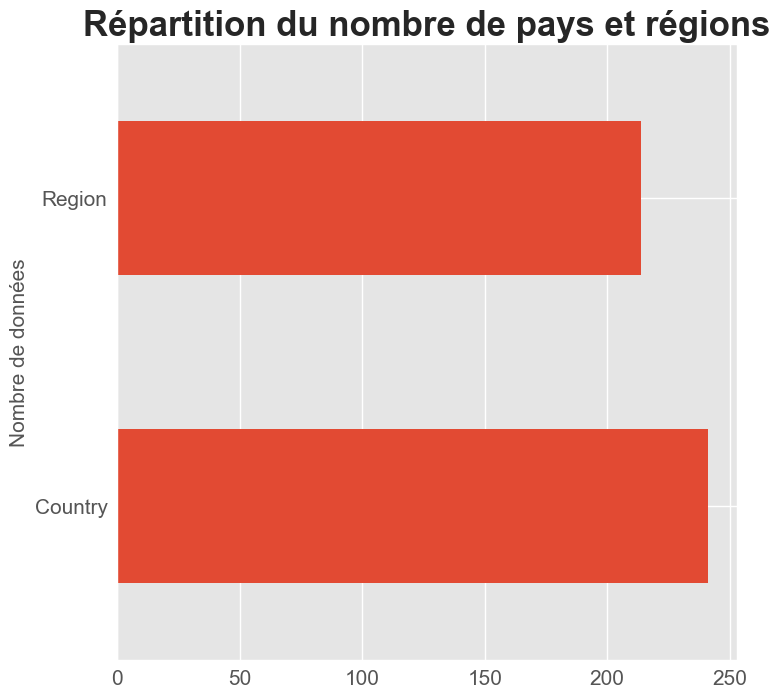

In [33]:
# Répartition du nombre de données renseignées 
a = EdStatsCountry.count()
ax = a.plot(kind='barh',figsize=(8, 8))
ax.set_title('Répartition du nombre de pays et régions')
ax.set_ylabel('Nombre de données')

In [35]:
missing_values(EdStatsCountry)

,Variable,nan,%nan
1,Region,27,11.2033%
0,Country,0,0.0000%


In [36]:
EdStatsCountry.Country.unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'The Bahamas',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland',
       'Channel Islands', 'Chile', 'China', "Côte d'Ivoire", 'Cameroon',
       'Dem. Rep. Congo', 'Congo', 'Colombia', 'Comoros', 'Cabo Verde',
       'Costa Rica', 'Cuba', 'Curaçao', 'Cayman Islands', 'Cyprus',
       'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria',
       'East Asia & Pacific (developing only)',
       'East Asia & Pacific (all income levels)',
       'Europe & Central Asia (developing only)',


 241 pays et 214 Région
 
- Dans la liste des pays il y a des Régions : North America
- Groupe de pays : OECD members,Lower middle income,Low & middle income,Middle income, Upper middle income,Low income,Least developed countries: UN classification,Euro area,Heavily indebted poor countries (HIPC),High income ,Arab World
- Je ne garde que les pays et j'exclue les zones

In [37]:
# # Liste de zone à exclure des pays

liste3=['North America','South Asia','Arab World','European Union','OECD members','Lower middle income','Low & middle income','Middle income','Upper middle income','Low income','Least developed countries: UN classification','Euro area','Heavily indebted poor countries (HIPC)','High income','East Asia & Pacific (developing only)','East Asia & Pacific (all income levels)','Europe & Central Asia (developing only)','Europe & Central Asia (all income levels)','Latin America & Caribbean (developing only)','Middle East & North Africa (all income levels)','Middle East & North Africa (developing only)','Sub-Saharan Africa (developing only)','Sub-Saharan Africa (all income levels)','World','Nauru','Latin America & Caribbean (all income levels)','Gibraltar']
EdStatsCountry=EdStatsCountry[~EdStatsCountry.Country.isin(liste3)]

In [38]:
summary(EdStatsCountry)

Data shape: (214, 2)
___________________________
Data types:
object    2
Name: types, dtype: int64
___________________________


,types,counts,uniques,nulls
Country,object,214,214,0
Region,object,214,7,0


In [39]:
EdStatsCountry.Region.unique()

array(['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa',
       'Europe & Central Asia', 'Middle East & North Africa',
       'East Asia & Pacific', 'North America'], dtype=object)

Text(0.5, 1.0, 'Nombre de pays par Région')

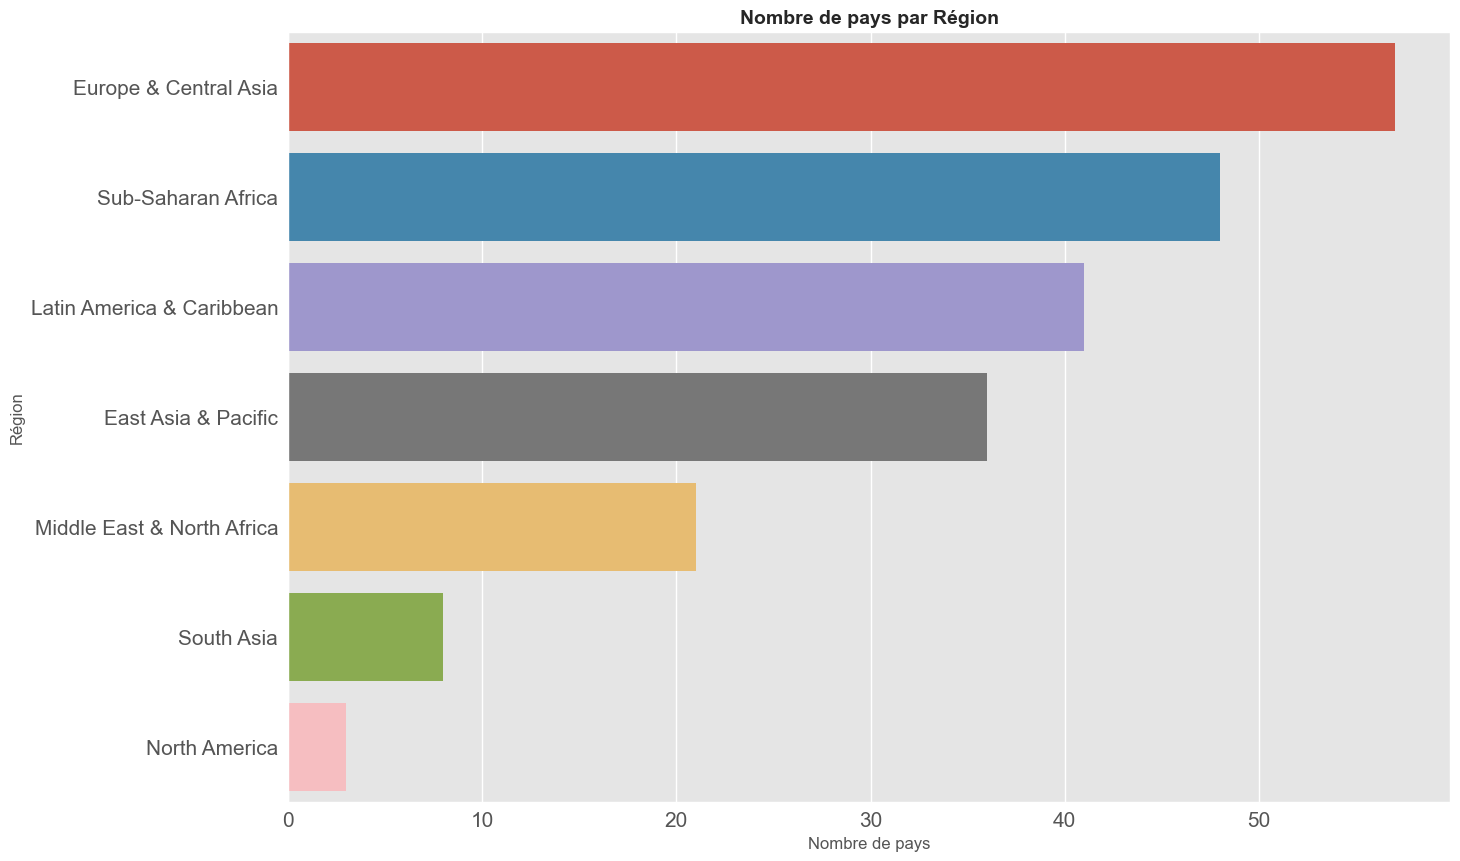

In [41]:
nb_pays_par_region=EdStatsCountry.groupby('Region')[['Country']].count().reset_index().sort_values(by='Country', ascending=False)

sns.barplot(x=nb_pays_par_region['Country'],y= nb_pays_par_region['Region'])
plt.xlabel('Nombre de pays', fontsize=12)
plt.ylabel('Région', fontsize=12)
plt.title('Nombre de pays par Région', fontsize=14)

In [42]:
EdStatsCountry.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 0 to 240
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  214 non-null    object
 1   Region   214 non-null    object
dtypes: object(2)
memory usage: 5.0+ KB


- Traitement sur le fichier df_EdStatsData 

In [43]:
colonne(EdStatsData)

La colonne  Country Name  : contient 242 valeur unique
La colonne  Country Code  : contient 242 valeur unique
La colonne  Indicator Name  : contient 3665 valeur unique
La colonne  Indicator Code  : contient 3665 valeur unique
La colonne  1970  : contient 24595 valeur unique
La colonne  1971  : contient 30892 valeur unique
La colonne  1972  : contient 30982 valeur unique
La colonne  1973  : contient 30988 valeur unique
La colonne  1974  : contient 31139 valeur unique
La colonne  1975  : contient 37838 valeur unique
La colonne  1976  : contient 32679 valeur unique
La colonne  1977  : contient 32808 valeur unique
La colonne  1978  : contient 32887 valeur unique
La colonne  1979  : contient 32359 valeur unique
La colonne  1980  : contient 39456 valeur unique
La colonne  1981  : contient 34090 valeur unique
La colonne  1982  : contient 32969 valeur unique
La colonne  1983  : contient 33683 valeur unique
La colonne  1984  : contient 33903 valeur unique
La colonne  1985  : contient 41133 vale

In [44]:
# Suppression des colonnes inutiles
EdStatsData.drop(["Country Code","Unnamed: 69"], axis = 1, inplace = True) 

In [45]:
# Renommer les colonnes
EdStatsData=EdStatsData.rename(columns={"Country Name":"Country"})

Text(0, 0.5, 'Nombre de données')

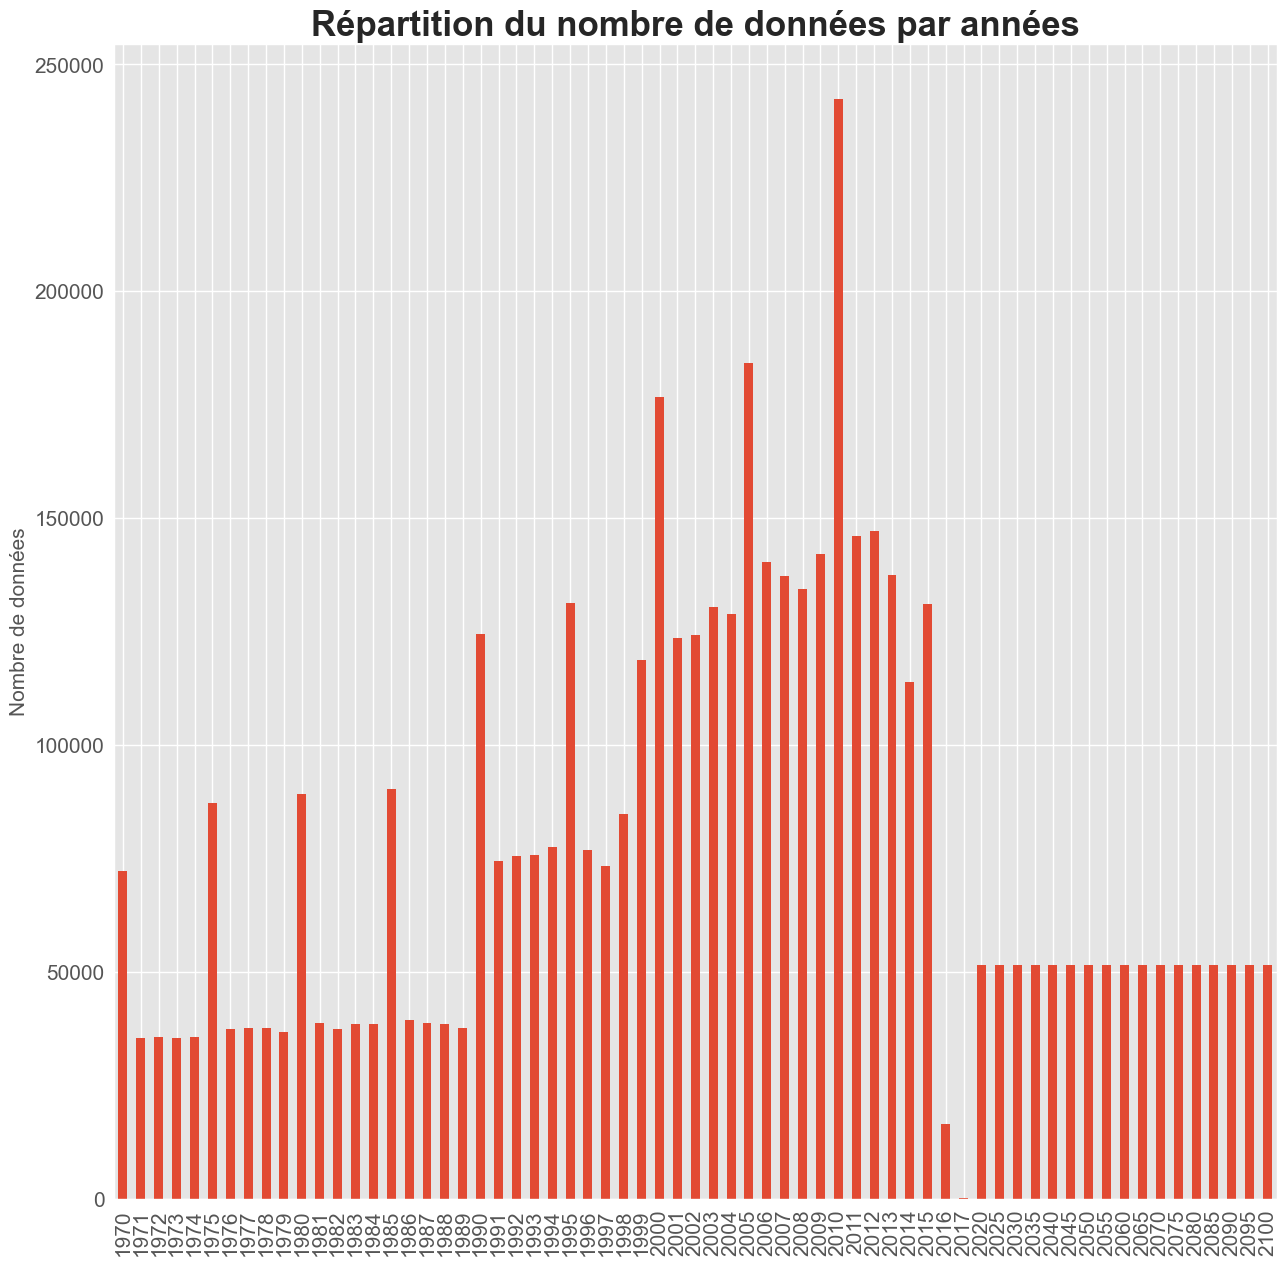

In [46]:
# Répartition du nombre de données par années 
date_df = EdStatsData.select_dtypes('float').count()
ax = date_df.plot(kind='bar',figsize=(15, 15))
ax.set_title('Répartition du nombre de données par années')
ax.set_ylabel('Nombre de données')

- Les années s'étalent de : 1970 à 2100
- Nous avons une hausse de données tous les 5 ans.
- A partir de 1990 les données sont doublées tous les 10 ans .
- Les années de 1970 à 1991 sont inexploitables vu que ce sont des années où y avait pas internet .
- L' année la plus récente remplie en données est 2015.
- Les années 2025 à 2100 sont des années de prédiction.
- L'année 2010 est l' année avec le plus de données significatives 
- Pas de données sur l'année 2017
- L'essor de l'utilisation du web n'est qu'à partir de l'année 2000.

In [47]:
missing_values(EdStatsData)

,Variable,nan,%nan
50,2017,886787,99.9839%
49,2016,870470,98.1442%
4,1971,851393,95.9933%
6,1973,851385,95.9924%
5,1972,851311,95.9840%
7,1974,851200,95.9715%
12,1979,850121,95.8498%
9,1976,849447,95.7738%
15,1982,849419,95.7707%
22,1989,849390,95.7674%


Un premier filtre : Je supprime les données manquantes au delà de 90%

In [48]:
# Supprimer colonnes
def supp_col_null(df):
    column_with_nan = df.columns[df.isnull().any()]
    for column in column_with_nan:
        if df[column].isnull().sum()*100.0/df.shape[0] > 90:
            df.drop(column,1, inplace=True)

In [49]:
supp_col_null(EdStatsData)

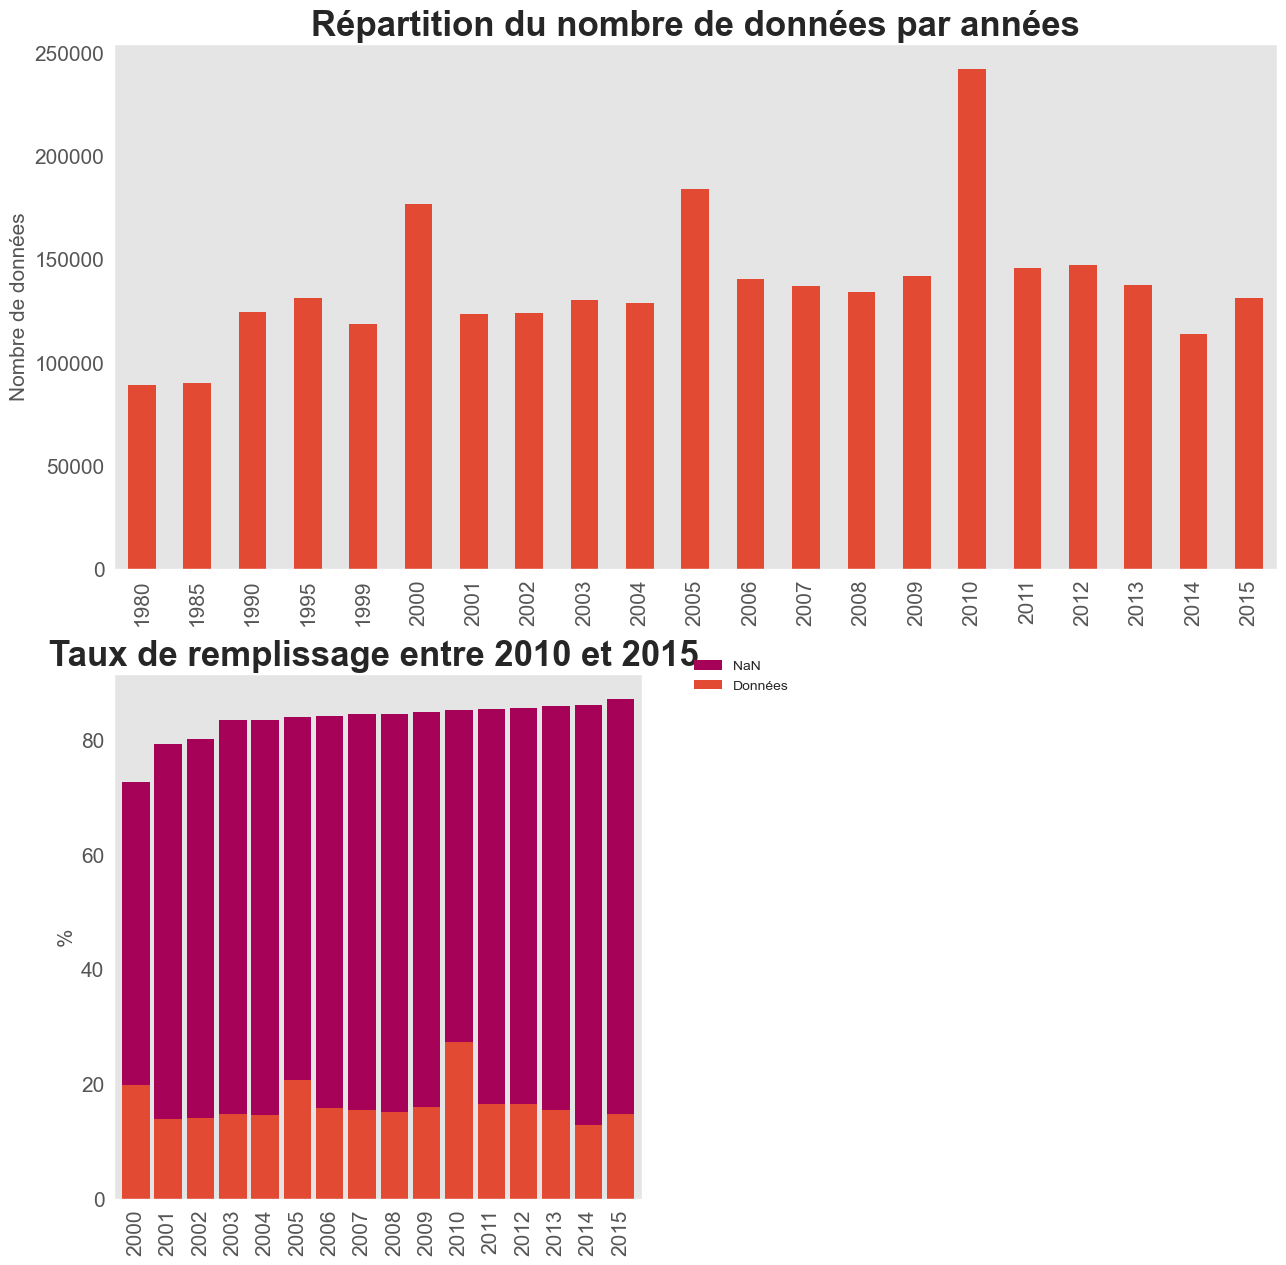

In [51]:
from matplotlib import gridspec
G = gridspec.GridSpec(2,2)

ax1 = plt.subplot(G[0, :])

# Répartition du nombre de données renseignées par années pour tous les indicateurs et tous les pays
date_df = EdStatsData.select_dtypes('float').count()
ax1 = date_df.plot(kind='bar',figsize=(15, 15))
ax1.set_title('Répartition du nombre de données par années')
ax1.set_ylabel('Nombre de données')
ax1.grid(False)

# Nombre de NaN par année de 2010 à 2015

ax2 = plt.subplot(G[1, 0])
# Nombre de données totales
size = EdStatsData.shape

nan_values1 = EdStatsData.loc[:,'2000':'2015'].isna().sum()
nan_values = nan_values1.sort_values(ascending=True)*100/size[0]

# Nombre de données non nulles par année de 2010 à 2015

donnes1=EdStatsData.loc[:,'2000':'2015'].count()
donnes=donnes1*100/size[0]

ax2 = nan_values.plot(kind='bar',label='NaN',color='m',width=0.85)
ax2 = donnes.plot(kind='bar', label='Données',zorder=2,width=0.85)


ax2.set_title("Taux de remplissage entre 2010 et 2015 ")
ax2.set_ylabel('%')
ax2.legend(bbox_to_anchor=(1.3, 1.05))

ax2.grid(False)

- Après le premier filtre les années s'étalent de : 1980 à 2015
- Les années de 1980 à 1999 sont inexploitables vu que ce sont des années où y avait pas internet .
- L'essor de l'utilisation du web n'est qu'à partir de l'année 2000.
- L' année la plus récente remplie en données est 2015.
- Les années 2025 à 2100 sont des années de prédiction.
- L'année 2010 est l' année avec le plus de données significatives 

Conclusion : 
- Je supprime les années de 1980 à 1999 et je garde les années de 2000 à 2015

In [52]:
# Supprimer les années 1980","1985
EdStatsData.drop(["1980","1985","1990","1995","1999"], axis = 1, inplace = True) 

In [54]:
EdStatsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country         886930 non-null  object 
 1   Indicator Name  886930 non-null  object 
 2   Indicator Code  886930 non-null  object 
 3   2000            176676 non-null  float64
 4   2001            123509 non-null  float64
 5   2002            124205 non-null  float64
 6   2003            130363 non-null  float64
 7   2004            128814 non-null  float64
 8   2005            184108 non-null  float64
 9   2006            140312 non-null  float64
 10  2007            137272 non-null  float64
 11  2008            134387 non-null  float64
 12  2009            142108 non-null  float64
 13  2010            242442 non-null  float64
 14  2011            146012 non-null  float64
 15  2012            147264 non-null  float64
 16  2013            137509 non-null  float64
 17  2014      

- Traitement sur le fichier df_EdStatsSeries afin de choisir les variables

In [55]:
# Itération sur les colonnes du dataframe pour afficher le nombre unique des valeurs
for colonne in EdStatsSeries.columns:
    print(colonne, " : ", EdStatsSeries[colonne].nunique())

SeriesCode  :  3665
Topic  :  37
Indicator Name  :  3665
Short definition  :  1169
Long definition  :  2060
Unit of measure  :  0
Periodicity  :  1
Base Period  :  4
Other notes  :  14
Aggregation method  :  3
Limitations and exceptions  :  9
Notes from original source  :  0
General comments  :  8
Source  :  31
Statistical concept and methodology  :  2
Development relevance  :  1
Related source links  :  1
Other web links  :  0
Related indicators  :  0
License Type  :  0
Unnamed: 20  :  0


- 3665 indicateur avec 3665 code
- 37 topic que je peux regrouper en groupes :Education, politique economique, santé, social,démographique
- les sujets importants pour notre analyse sont : Education,economique , démographique
- Je garde 11 topic que j'explore

In [56]:
# Garder que les topics importats à notre analyse   
# 11 topics au lieu de 37
liste1=['Attainment','Infrastructure: Communications','Learning Outcomes','Economic Policy & Debt: Purchasing power parity','School Finance','Literacy','Secondary','Expenditures','Population','Health: Population: Dynamics']
liste1

['Attainment',
 'Infrastructure: Communications',
 'Learning Outcomes',
 'Economic Policy & Debt: Purchasing power parity',
 'School Finance',
 'Literacy',
 'Secondary',
 'Expenditures',
 'Population',
 'Health: Population: Dynamics']

In [57]:
# Garder que les topics de la liste créé
EdStatsSeries=EdStatsSeries[EdStatsSeries.Topic.isin(liste1)]

In [58]:
EdStatsSeries.shape

(2382, 21)

2381 indicateur au lieu de 3665

- Chercher dans chaque topic et selectionner les variables necessaires pour l'analyse à savoir des indicateurs éducatif,économique et démographique

In [59]:
EdStatsSeries[EdStatsSeries["Topic"]=="Attainment"].head()

,SeriesCode,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age 15-19 with no education,Percentage of female population age 15-19 with no education,Percentage of female population age 15-19 with no education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 with no education,Percentage of population age 15-19 with no education,Percentage of population age 15-19 with no education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age 15+ with no education,Percentage of female population age 15+ with no education,Percentage of female population age 15+ with no education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ with no education,Percentage of population age 15+ with no education,Percentage of population age 15+ with no education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age 20-24 with no education,Percentage of female population age 20-24 with no education,Percentage of female population age 20-24 with no education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Indicateur à garder du topic Attainment : BAR.SEC.CMPT.2024.ZS (Percentage of population age 20-24 with secondary schooling. Completed Secondary), BAR.SEC.CMPT.1519.ZS(Percentage of population age 15-19 with secondary schooling. Completed Secondary)

In [58]:
EdStatsSeries[EdStatsSeries["Topic"]=="Infrastructure: Communications"].head()

,SeriesCode,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
610,IT.CMP.PCMP.P2,Infrastructure: Communications,Personal computers (per 100 people),NaN,Personal computers are self-contained computers designed to be used by a single individual.,NaN,Annual,NaN,NaN,Weighted average,NaN,NaN,Restricted use: Please cite the International Telecommunication Union for third-party use of these data. This indicator is not available in the World Development Indicators time series database.,"International Telecommunication Union, World Telecommunication/ICT Development Report and database.",NaN,NaN,NaN,NaN,NaN,NaN,NaN
611,IT.NET.USER.P2,Infrastructure: Communications,Internet users (per 100 people),NaN,"Internet users are individuals who have used the Internet (from any location) in the last 3 months. The Internet can be used via a computer, mobile phone, personal digital assistant, games machine, digital TV etc.",NaN,Annual,NaN,NaN,Weighted average,"Operators have traditionally been the main source of telecommunications data, so information on subscriptions has been widely available for most countries. This gives a general idea of access, but a more precise measure is the penetration rate - the share of households with access to telecommunications. During the past few years more information on information and communication technology use has become available from household and business surveys. Also important are data on actual use of telecommunications services. Ideally, statistics on telecommunications (and other information and communications technologies) should be compiled for all three measures: subscriptions, access, and use. The quality of data varies among reporting countries as a result of differences in regulations covering data provision and availability.\n\nDiscrepancies may also arise in cases where the end of a fiscal year differs from that used by ITU, which is the end of December of every year. A number of countries have fiscal years that end in March or June of every year.",NaN,Please cite the International Telecommunication Union for third-party use of these data.,"International Telecommunication Union, World Telecommunication/ICT Development Report and database.",NaN,NaN,NaN,NaN,NaN,NaN,NaN


Je garde les deux indicateurs :
- Personal computers (per 100 people):	IT.CMP.PCMP.P2
- Internet users (per 100 people) : IT.NET.USER.P2	

In [59]:
df_learning=EdStatsSeries[EdStatsSeries["Topic"]=="Learning Outcomes"]
df_learning.head()

,SeriesCode,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
612,LO.EGRA.CLPM.AFA.2GRD,Learning Outcomes,EGRA: Correct Letter Names Read Per Minute (Mean). Afan Oromo. 2nd Grade,"Average number of letter names that students could read per minute. In this EGRA subtask, assessors present students with a sheet listing between 50 and 100 upper- and lowercase letters of the alphabet (in some languages, graphemes, or sets of letters and/or symbols representing a single sound, are presented). Students are asked to provide the names of all the letters that they can in one minute. Users are discouraged from using these data to make direct comparisons across countries or languages. Consult the EdData website and the specific country report for more information: www.eddataglobal.org.","Average number of letter names that students could read per minute. In this EGRA subtask, assessors present students with a sheet listing between 50 and 100 upper- and lowercase letters of the alphabet (in some languages, graphemes, or sets of letters and/or symbols representing a single sound, are presented). Students are asked to provide the names of all the letters that they can in one minute. Users are discouraged from using these data to make direct comparisons across countries or languages. Consult the EdData website and the specific country report for more information: www.eddataglobal.org.",NaN,NaN,NaN,EGRA,NaN,NaN,NaN,NaN,Early Grade Reading Assessment (EGRA): https://www.eddataglobal.org/reading/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
613,LO.EGRA.CLPM.AFA.3GRD,Learning Outcomes,EGRA: Correct Letter Names Read Per Minute (Mean). Afan Oromo. 3rd Grade,"Average number of letter names that students could read per minute. In this EGRA subtask, assessors present students with a sheet listing between 50 and 100 upper- and lowercase letters of the alphabet (in some languages, graphemes, or sets of letters and/or symbols representing a single sound, are presented). Students are asked to provide the names of all the letters that they can in one minute. Users are discouraged from using these data to make direct comparisons across countries or languages. Consult the EdData website and the specific country report for more information: www.eddataglobal.org.","Average number of letter names that students could read per minute. In this EGRA subtask, assessors present students with a sheet listing between 50 and 100 upper- and lowercase letters of the alphabet (in some languages, graphemes, or sets of letters and/or symbols representing a single sound, are presented). Students are asked to provide the names of all the letters that they can in one minute. Users are discouraged from using these data to make direct comparisons across countries or languages. Consult the EdData website and the specific country report for more information: www.eddataglobal.org.",NaN,NaN,NaN,EGRA,NaN,NaN,NaN,NaN,Early Grade Reading Assessment (EGRA): https://www.eddataglobal.org/reading/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
614,LO.EGRA.CLPM.AMH.2GRD,Learning Outcomes,EGRA: Correct Letter Names Read Per Minute (Mean). Amharic. 2nd Grade,"Average number of letter names that students could read per minute. In this EGRA subtask, assessors present students with a sheet listing between 50 and 100 upper- and lowercase letters of the alphabet (in some languages, graphemes, or sets of letters and/or symbols representing a single sound, are presented). Students are asked to provide the names of all the letters that they can in one minute. Users are discouraged from using these data to make direct comparisons across countries or languages. Consult the EdData website and the specific country report for more information: www.eddata

- Je garde : LO.TIMSS.MAT4(TIMSS: Mean performance on the mathematics scale for fourth grade students, total)

In [60]:
EdStatsSeries[EdStatsSeries["Topic"]=="Economic Policy & Debt: Purchasing power parity"].head()

,SeriesCode,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
1660,NY.GDP.MKTP.PP.CD,Economic Policy & Debt: Purchasing power parity,"GDP, PPP (current international $)",NaN,PPP GDP is gross domestic product converted to international dollars using purchasing power parity rates. An international dollar has the same purchasing power over GDP as the U.S. dollar has in the United States. GDP is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in current international dollars. For most economies PPP figures are extrapolated from the 2011 International Comparison Program (ICP) benchmark estimates or imputed using a statistical model based on the 2011 ICP. For 47 high- and upper middle-income economies conversion factors are provided by Eurostat and the Organisation for Economic Co-operation and Development (OECD).,NaN,Annual,NaN,NaN,Gap-filled total,NaN,NaN,NaN,"World Bank, International Comparison Program database.",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1661,NY.GDP.MKTP.PP.KD,Economic Policy & Debt: Purchasing power parity,"GDP, PPP (constant 2011 international $)",NaN,PPP GDP is gross domestic product converted to international dollars using purchasing power parity rates. An international dollar has the same purchasing power over GDP as the U.S. dollar has in the United States. GDP is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in constant 2011 international dollars.,NaN,Annual,2011,NaN,Gap-filled total,NaN,NaN,NaN,"World Bank, International Comparison Program database.",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1664,NY.GDP.PCAP.PP.CD,Economic Policy & Debt: Purchasing power parity,"GDP per capita, PPP (current international $)",NaN,GDP per capita based on purchasing power parity (PPP). PPP GDP is gross domestic product converted to international dollars using purchasing power parity rates. An international dollar has the same purchasing power over GDP as the U.S. dollar has in the United States. GDP at purchaser's prices is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in current international dollars based on the 2011 ICP round.,NaN,Annual,NaN,NaN,Weighted average,NaN,NaN,NaN,"World Bank, International Comparison Program database.",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1665,NY.GDP.PCAP.PP.KD,Economic Policy & Debt: Purchasing power parity,"GDP per capita, PPP (constant 2011 international $)",NaN,GDP per capita based on purchasing power parity (PPP). PPP GDP is gross domestic product converted to international dollars using purchasing power parity rates. An international dollar has the same purchasing power over GDP as the U.S. dollar has in the United States. GDP at purchaser's prices is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in constant 2011 internatio

- Je garde : NY.GDP.PCAP.PP.CD : GDP per capita, PPP (current international $) qui est PIB par habitant, PPA (dollars internationaux courants)

In [61]:
EdStatsSeries[EdStatsSeries["Topic"]=="School Finance"]

,SeriesCode,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20


- Pas de données relatives à ce topic

In [62]:
df_literacy=EdStatsSeries[EdStatsSeries["Topic"]=="Literacy"]
df_literacy.shape

(32, 21)

In [63]:
df_literacy.head()

,SeriesCode,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
2209,SE.ADT.1524.LT.FE.ZS,Literacy,"Youth literacy rate, population 15-24 years, female (%)",NaN,"Number of females age 15 to 24 years who can both read and write with understanding a short simple statement on their everyday life, divided by the female population in that age group. Generally, ‘literacy’ also encompasses ‘numeracy’, the ability to make simple arithmetic calculations. Divide the number of people aged 15 to 24 years who are literate by the total population in the same age group and multiply the result by 100.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2210,SE.ADT.1524.LT.FM.ZS,Literacy,"Youth literacy rate, population 15-24 years, gender parity index (GPI)",NaN,"Ratio of female youth literacy rate to male youth literacy rate. It is calculated by dividing the female value for the indicator by the male value for the indicator. A GPI equal to 1 indicates parity between females and males. In general, a value less than 1 indicates disparity in favor of males and a value greater than 1 indicates disparity in favor of females.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2211,SE.ADT.1524.LT.MA.ZS,Literacy,"Youth literacy rate, population 15-24 years, male (%)",NaN,"Number of males age 15 to 24 years who can both read and write with understanding a short simple statement on their everyday life, divided by the male population in that age group. Generally, ‘literacy’ also encompasses ‘numeracy’, the ability to make simple arithmetic calculations. Divide the number of people aged 15 to 24 years who are literate by the total population in the same age group and multiply the result by 100.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2212,SE.ADT.1524.LT.ZS,Literacy,"Youth literacy rate, population 15-24 years, both sexes (%)",NaN,"Number of people age 15 to 24 years who can both read and write with understanding a short simple statement on their everyday life, divided by the population in that age group. Generally, ‘literacy’ also encompasses ‘numeracy’, the ability to make simple arithmetic calculations. Divide the number of people aged 15 to 24 years who are literate by the total population in the same age group and multiply the result by 100.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2213,SE.ADT.LITR.FE.ZS,Literacy,"Adult literacy rate, population 15+ years, female (%)",NaN,"Percentage of females age 15 and above who can, with understanding, read and write a short, simple statement on their everyday life. Generally, ‘literacy’ also encompasses ‘numeracy’, the ability to make simple arithmetic calculations. This indicator is calculated by dividing the number of female literates aged 15 years and over by the corresponding age group population and multiplying the result by 100.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Je garde: UIS.LP.Ag15t24 (Youth illiterate population, 15-24 years, both sexes (number))

In [64]:
df_secondary=EdStatsSeries[EdStatsSeries["Topic"]=="Secondary"]
df_secondary.shape

(256, 21)

In [65]:
df_secondary.head()

,SeriesCode,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
2218,SE.ENR.PRSC.FM.ZS,Secondary,"Gross enrolment ratio, primary and secondary, gender parity index (GPI)",NaN,"Ratio of female gross enrolment ratio for primary and secondary to male gross enrolment ratio for primary and secondary. It is calculated by dividing the female value for the indicator by the male value for the indicator. A GPI equal to 1 indicates parity between females and males. In general, a value less than 1 indicates disparity in favor of males and a value greater than 1 indicates disparity in favor of females.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2219,SE.ENR.SECO.FM.ZS,Secondary,"Gross enrolment ratio, secondary, gender parity index (GPI)",NaN,"Ratio of female gross enrolment ratio for secondary to male gross enrolment ratio for secondary. It is calculated by dividing the female value for the indicator by the male value for the indicator. A GPI equal to 1 indicates parity between females and males. In general, a value less than 1 indicates disparity in favor of males and a value greater than 1 indicates disparity in favor of females.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2287,SE.SEC.AGES,Secondary,Official entrance age to lower secondary education (years),NaN,"Age at which students would enter lower secondary education, assuming they had started at the official entrance age for the lowest level of education, had studied full-time throughout and had progressed through the system without repeating or skipping a grade.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2288,SE.SEC.CMPT.LO.FE.ZS,Secondary,"Lower secondary completion rate, female (%)",NaN,"Total number of new female entrants in the last grade of lower secondary education, regardless of age, expressed as percentage of the total female population of the theoretical entrance age to the last grade of lower secondary. This indicator is also known as ""Gross intake rate to the last grade of lower secondary general education."" The ratio can exceed 100 percent due to over-aged and under-aged children who enter lower secondary school late/early and/or repeat grades. Data limitations preclude adjusting for students who drop out during the final year of lower secondary education. Thus this rate is a proxy that should be taken as an upper estimate of the actual lower secondary completion rate.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2289,SE.SEC.CMPT.LO.MA.ZS,Secondary,"Lower secondary completion rate, male (%)",NaN,"Total number of new male entrants in the last grade of lower secondary education, regardless of age, expressed as percentage of the total male population of the theoretical entrance age to the last grade of lower secondary. This indicator is also known as ""Gross intake rate to the last grade of lower secondary general education."" The ratio can exceed 100 percent due to over-aged and under-aged children who enter lower secondary school late/early and/or repeat grades. Data limitations preclude adjusting for students who drop out during the final year of lower secondary education. Thus this rate is a proxy that should be taken as an upper estimate of the actual lower secondary completion rate.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Je garde : SE.SEC.ENRR(Gross enrolment ratio, secondary, both sexes (%))

In [66]:
df_Expenditures=EdStatsSeries[EdStatsSeries["Topic"]=="Expenditures"]
df_Expenditures.shape

(93, 21)

In [67]:
df_Expenditures.head()

,SeriesCode,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
2373,SE.XPD.CUR.TOTL.ZS,Expenditures,Current expenditure as % of total expenditure in public institutions (%),"Current expenditure expressed as a percentage of direct expenditure in public educational institutions (instructional and non-instructional). Financial aid to students and other transfers are excluded from direct expenditure. Current expenditure is consumed within the current year and would have to be renewed if needed in the following year. It includes staff compensation and current expenditure other than for staff compensation (ex. on teaching materials, ancillary services and administration). Divide all current expenditure in public institutions by total expenditure (current and capital) in public institutions, and multiply by 100. For more information, consult the UNESCO Institute of Statistics website: http://www.uis.unesco.org/Education/","Current expenditure expressed as a percentage of direct expenditure in public educational institutions (instructional and non-instructional). Financial aid to students and other transfers are excluded from direct expenditure. Current expenditure is consumed within the current year and would have to be renewed if needed in the following year. It includes staff compensation and current expenditure other than for staff compensation (ex. on teaching materials, ancillary services and administration). Divide all current expenditure in public institutions by total expenditure (current and capital) in public institutions, and multiply by 100. For more information, consult the UNESCO Institute of Statistics website: http://www.uis.unesco.org/Education/",NaN,NaN,NaN,All Levels,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2374,SE.XPD.PRIM.PC.ZS,Expenditures,Government expenditure per primary student as % of GDP per capita (%),"Average total (current, capital and transfers) general government expenditure per student in the given level of education, expressed as a percentage of GDP per capita. Divide total government expenditure for a given level of education (ex. primary, secondary) by total enrolment in that same level, divide again by GDP per capita, and multiply by 100. For more information, consult the UNESCO Institute of Statistics website: http://www.uis.unesco.org/Education/","Average total (current, capital and transfers) general government expenditure per student in the given level of education, expressed as a percentage of GDP per capita. Divide total government expenditure for a given level of education (ex. primary, secondary) by total enrolment in that same level, divide again by GDP per capita, and multiply by 100. For more information, consult the UNESCO Institute of Statistics website: http://www.uis.unesco.org/Education/",NaN,NaN,NaN,Primary,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2375,SE.XPD.PRIM.ZS,Expenditures,Expenditure on primary as % of government expenditure on education (%),"Expenditure on education by level of education, expressed as a percentage of total general government expenditure on education. Divide government expenditure on a given level of education (ex. primary, secondary) by total government expenditure on education (all levels combined), and multiply by 100. A high percentage of government expenditure on education spent on a given level denotes a high priority given to that level compared to others. When interpreting this indicator, one should take into account enrolment at that level, and the relative costs per student between different levels of education. For more information, consult the UNESCO Institute of Statistics website: http:/

- Je garde : XGDP.56.FSGOV.FDINSTADM.FFD			 :(Expenditure on education as % of total government expenditure (%))


In [68]:
df_EdStatsSeries[df_EdStatsSeries["Topic"]=="Engaging the Private Sector (SABER)"]

,SeriesCode,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20


In [69]:
df_Populations=EdStatsSeries[EdStatsSeries["Topic"]=="Population"]
df_Populations.shape

(213, 21)

In [70]:
df_Populations.head()

,SeriesCode,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
2405,SP.POP.0305.FE.UN,Population,"Population, ages 3-5, female","Population, ages 3-5, female is the total number of females age 3-5.","Population, ages 3-5, female is the total number of females age 3-5.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics (Derived),NaN,NaN,NaN,NaN,NaN,NaN,NaN
2406,SP.POP.0305.MA.UN,Population,"Population, ages 3-5, male","Population, ages 3-5, male is the total number of males age 3-5.","Population, ages 3-5, male is the total number of males age 3-5.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics (Derived),NaN,NaN,NaN,NaN,NaN,NaN,NaN
2407,SP.POP.0305.TO.UN,Population,"Population, ages 3-5, total","Population, ages 3-5, total is the total population age 3-5.","Population, ages 3-5, total is the total population age 3-5.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics (Derived),NaN,NaN,NaN,NaN,NaN,NaN,NaN
2408,SP.POP.0406.FE.UN,Population,"Population, ages 4-6, female","Population, ages 4-6, female is the total number of females age 4-6.","Population, ages 4-6, female is the total number of females age 4-6.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics (Derived),NaN,NaN,NaN,NaN,NaN,NaN,NaN
2409,SP.POP.0406.MA.UN,Population,"Population, ages 4-6, male","Population, ages 4-6, male is the total number of males age 4-6.","Population, ages 4-6, male is the total number of males age 4-6.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics (Derived),NaN,NaN,NaN,NaN,NaN,NaN,NaN


Je garde : SP.POP.1524.TO.UN (Population, ages 15-24, total)

In [71]:
EdStatsSeries[EdStatsSeries["Topic"]=="Post-secondaire/non tertiaire"]

,SeriesCode,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20


- Ce topic est vide

In [72]:
EdStatsSeries[EdStatsSeries["Topic"]=="Health: Population: Dynamics"]

,SeriesCode,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
2589,SP.POP.GROW,Health: Population: Dynamics,Population growth (annual %),"Annual population growth rate. Population is based on the de facto definition of population, which counts all residents regardless of legal status or citizenship.","Annual population growth rate for year t is the exponential rate of growth of midyear population from year t-1 to t, expressed as a percentage . Population is based on the de facto definition of population, which counts all residents regardless of legal status or citizenship.",NaN,Annual,NaN,NaN,Weighted average,NaN,NaN,NaN,"Derived from total population. Population source: (1) United Nations Population Division. World Population Prospects, (2) Census reports and other statistical publications from national statistical offices, (3) Eurostat: Demographic Statistics, (4) United Nations Statistical Division. Population and Vital Statistics Reprot (various years), (5) U.S. Census Bureau: International Database, and (6) Secretariat of the Pacific Community: Statistics and Demography Programme.",NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Je garde SP.POP.GROW	((Population growth (annual %)))

- Je garde 10 indicateurs du df_EdStatsData

In [60]:
liste2=['BAR.SEC.CMPT.1519.ZS','BAR.SEC.CMPT.2024.ZS','IT.NET.USER.P2','IT.CMP.PCMP.P2','LO.TIMSS.MAT4','NY.GDP.PCAP.PP.CD','UIS.LP.Ag15t24','SE.SEC.ENRR','XGDP.56.FSGOV.FDINSTADM.FFD','SP.POP.1524.TO.UN','SP.POP.GROW']

In [61]:
# Renommer les colonnes
EdStatsData=EdStatsData.rename(columns={"Indicator Code":"IndicatorCode"})

In [62]:
# Je garde uniquement lesindicateurs choisis
EdStatsData=EdStatsData[EdStatsData.IndicatorCode.isin(liste2)]

In [63]:
EdStatsData.shape

(2420, 19)

In [64]:
EdStatsData.IndicatorCode.unique()

array(['BAR.SEC.CMPT.1519.ZS', 'BAR.SEC.CMPT.2024.ZS',
       'NY.GDP.PCAP.PP.CD', 'XGDP.56.FSGOV.FDINSTADM.FFD', 'SE.SEC.ENRR',
       'IT.NET.USER.P2', 'IT.CMP.PCMP.P2', 'SP.POP.GROW',
       'SP.POP.1524.TO.UN', 'LO.TIMSS.MAT4'], dtype=object)

In [65]:
# Supprimer les colonnes inutiles, je supprime le code d'indicateur et je garde le nom pour une meilleure interprétation
EdStatsData.drop(["IndicatorCode"], axis = 1, inplace = True) 

In [66]:
EdStatsData=EdStatsData.rename(columns={"Indicator Name":"IndicatorName"})

In [67]:
EdStatsData.IndicatorName.unique()

array(['Barro-Lee: Percentage of population age 15-19 with secondary schooling. Completed Secondary',
       'Barro-Lee: Percentage of population age 20-24 with secondary schooling. Completed Secondary',
       'GDP per capita, PPP (current international $)',
       'Government expenditure in tertiary institutions as % of GDP (%)',
       'Gross enrolment ratio, secondary, both sexes (%)',
       'Internet users (per 100 people)',
       'Personal computers (per 100 people)',
       'Population growth (annual %)', 'Population, ages 15-24, total',
       'TIMSS: Mean performance on the mathematics scale for fourth grade students, total'],
      dtype=object)

- Jointure des dataframes pour avoir un dataframe regroupant les pays, régions avec leurs indicateurs étalés de 2000 à 2015

In [68]:
df_final=pd.merge(EdStatsCountry,EdStatsData, on='Country',how='inner')

In [69]:
summary(df_final)

Data shape: (1950, 19)
___________________________
Data types:
float64    16
object      3
Name: types, dtype: int64
___________________________


,types,counts,uniques,nulls
2000,float64,1319,1313,631
2001,float64,1085,1086,865
2002,float64,1096,1096,854
2003,float64,1089,1090,861
2004,float64,1096,1096,854
2005,float64,1357,1354,593
2006,float64,1019,1018,931
2007,float64,1013,1009,937
2008,float64,962,951,988
2009,float64,942,930,1008


- Reformater le dataframe pour avoir l'année la plus récente disponible en données
- De 2010 à 2015 pas de données relatives à la variable Personnal computers, par conséquent cette variable sera écartée

In [70]:
# Reformater le dataframe pour avoir l'année la plus récente disponible en données
df_final=pd.pivot_table(df_final, values='2015', index=['Country'], columns=['IndicatorName'])
df_final.head()

IndicatorName,"GDP per capita, PPP (current international $)",Government expenditure in tertiary institutions as % of GDP (%),"Gross enrolment ratio, secondary, both sexes (%)",Internet users (per 100 people),Population growth (annual %),"Population, ages 15-24, total","TIMSS: Mean performance on the mathematics scale for fourth grade students, total"
Country,,,,,,,
Afghanistan,1864.973641,NaN,55.644409,8.260000,2.943234,7252785.0,NaN
Albania,11449.094589,NaN,95.765488,63.252933,-0.291206,556269.0,NaN
Algeria,14643.343064,NaN,NaN,38.200000,1.919959,6467818.0,NaN
American Samoa,NaN,NaN,NaN,NaN,0.180222,NaN,NaN
Andorra,NaN,NaN,NaN,96.910000,-1.537836,NaN,NaN


[Text(0, 0, 'GDP per capita, PPP (current international $)'),
 Text(1, 0, 'Government expenditure in tertiary institutions as % of GDP (%)'),
 Text(2, 0, 'Gross enrolment ratio, secondary, both sexes (%)'),
 Text(3, 0, 'Internet users (per 100 people)'),
 Text(4, 0, 'Population growth (annual %)'),
 Text(5, 0, 'Population, ages 15-24, total'),
 Text(6, 0, 'TIMSS: Mean performance on the mathematics scale for fourth grade students, total')]

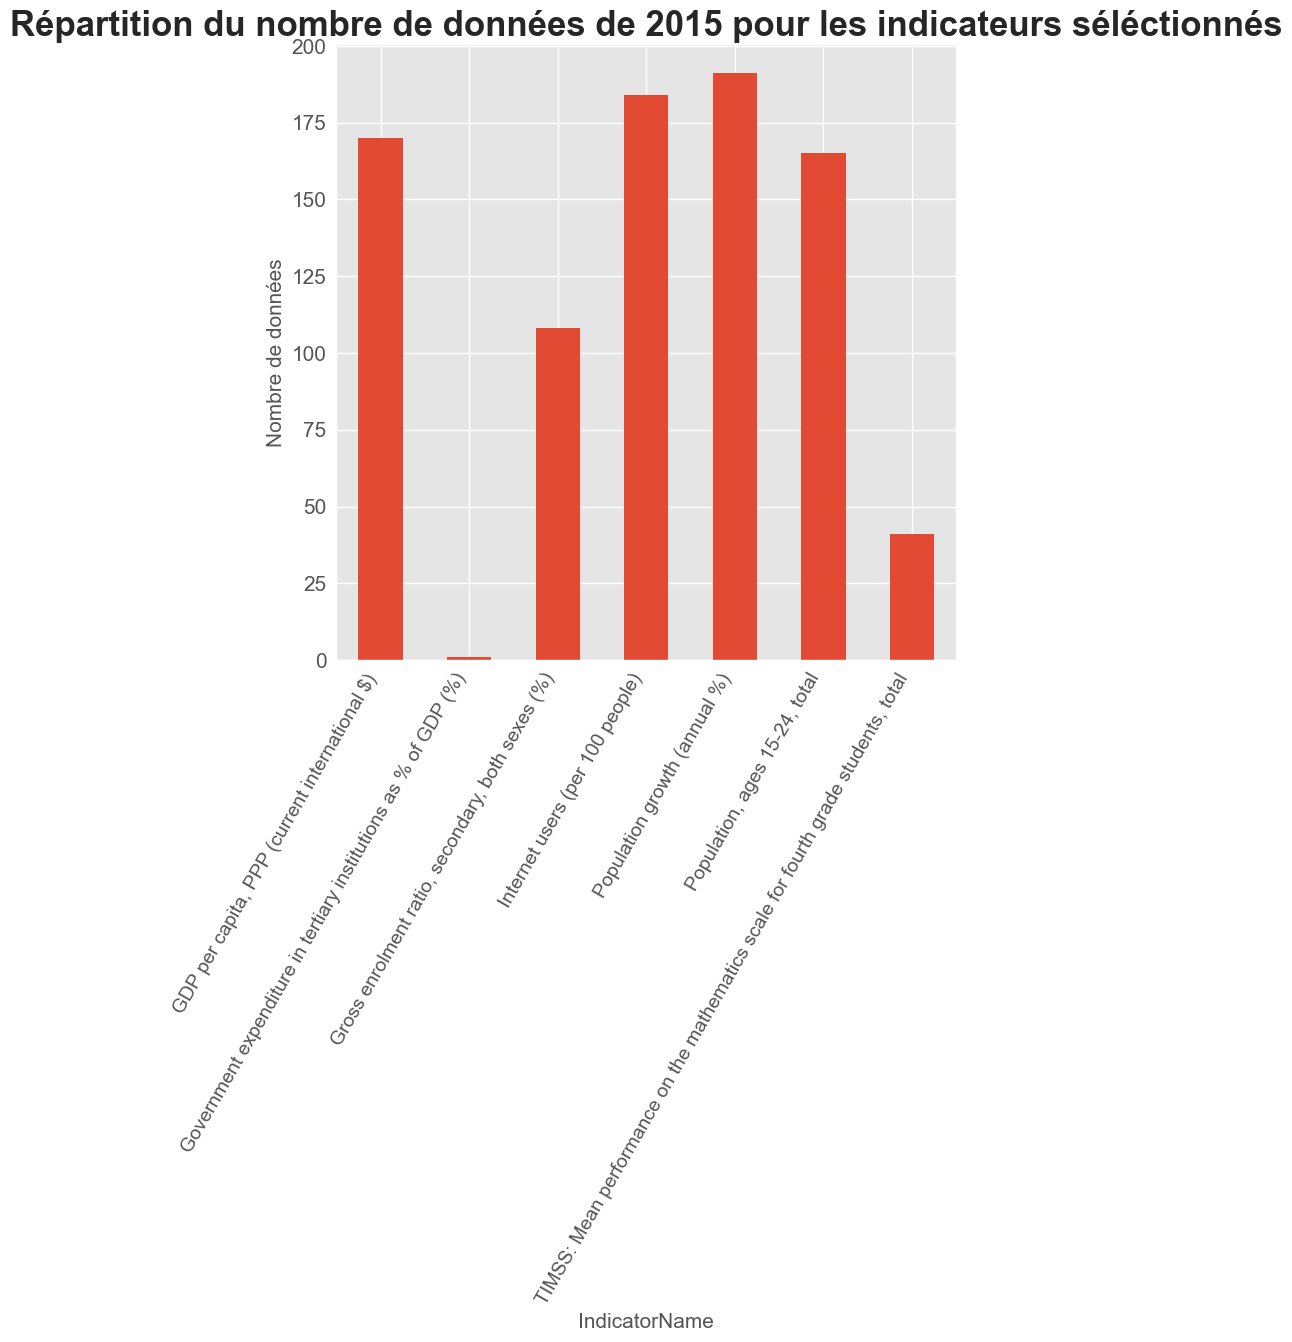

In [71]:
# Répartition du nombre de données pour l'année 2015
date_df = df_final.count()
ax = date_df.plot(kind='bar',figsize=(8,8))
ax.set_title("Répartition du nombre de données de 2015 pour les indicateurs séléctionnés")
ax.set_ylabel('Nombre de données')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right",fontsize=14)

- Peu de données pour les deux variables: Gross enrolment ratio, secondary, both sexes (%) et Government expenditure in tertiary institutions as % of GDP (%)

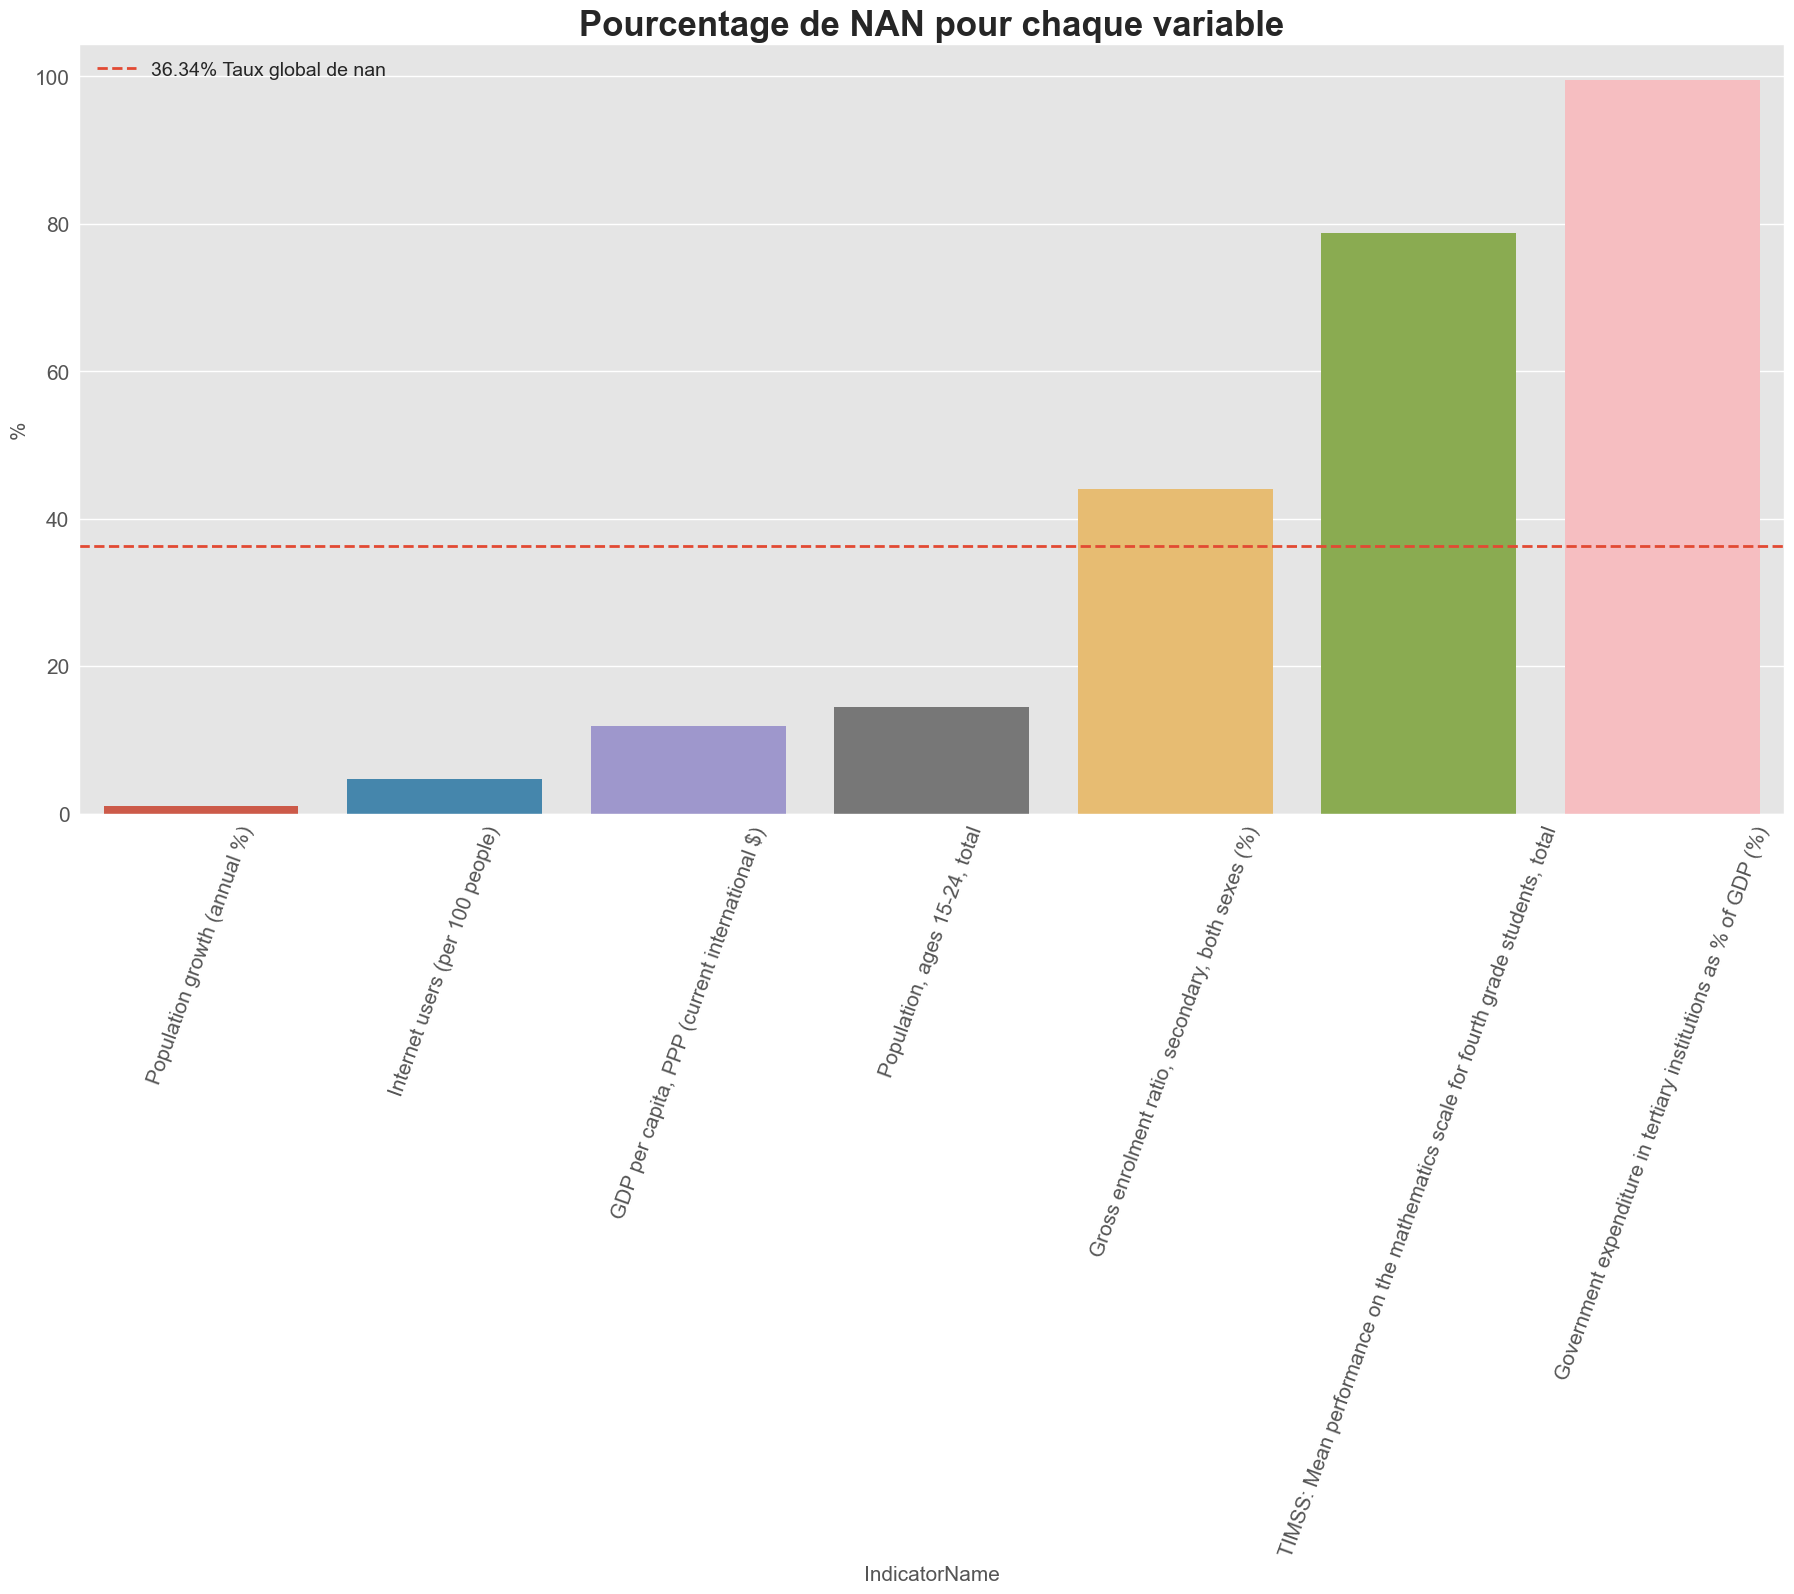

In [72]:
plot_nan(df_final)

- Beaucoup de données manquantes pour les deux variables : Gross enrolment ratio, secondary, both sexes (%) et Government expenditure in tertiary institutions as % of GDP (%)

In [73]:
# Garder les données avec moins de 70% données manquantes

df_final=df_final[df_final.columns[df_final.isna().sum()/df_final.shape[0] <0.7]] 

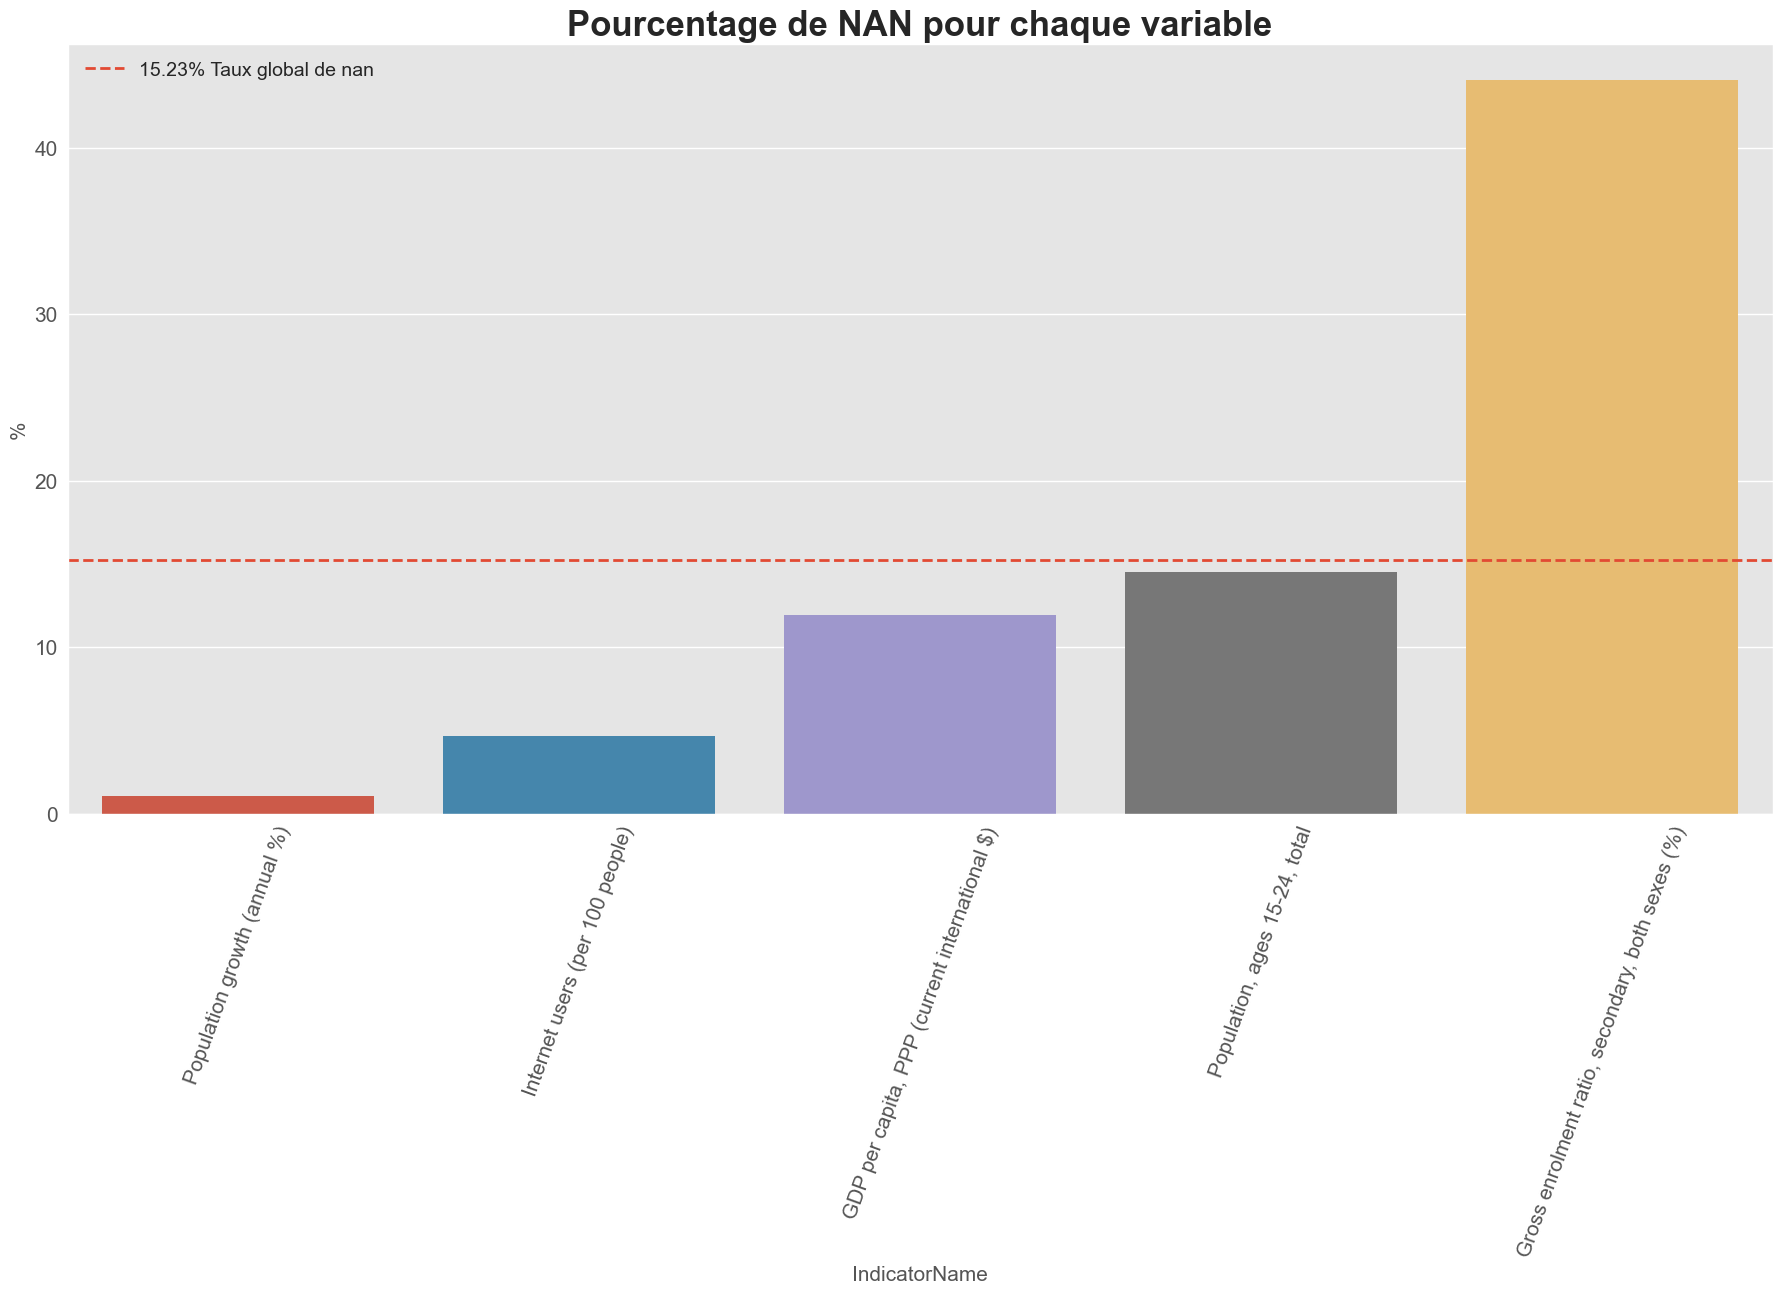

In [74]:
plot_nan(df_final)

- Government expenditure in tertiary institutions as % of GDP (%)  et TIMSS: Mean performance on the mathematics scale for fourth grade students, total ont été supprimées

In [75]:
# Je crée une colonne pour compter le taux de valeurs manquantes par lignes et je supprime selon un seuil
df_final['NB_NAN']=df_final.isna().sum(axis=1)*100 / df_final.shape[1]
df_final.head()

IndicatorName,"GDP per capita, PPP (current international $)","Gross enrolment ratio, secondary, both sexes (%)",Internet users (per 100 people),Population growth (annual %),"Population, ages 15-24, total",NB_NAN
Country,,,,,,
Afghanistan,1864.973641,55.644409,8.260000,2.943234,7252785.0,0.0
Albania,11449.094589,95.765488,63.252933,-0.291206,556269.0,0.0
Algeria,14643.343064,NaN,38.200000,1.919959,6467818.0,20.0
American Samoa,NaN,NaN,NaN,0.180222,NaN,80.0
Andorra,NaN,NaN,96.910000,-1.537836,NaN,60.0


In [76]:
# J'affiche les pays avec 60% et plus de données manquantes
df_final[df_final['NB_NAN'] >= 60.0]

IndicatorName,"GDP per capita, PPP (current international $)","Gross enrolment ratio, secondary, both sexes (%)",Internet users (per 100 people),Population growth (annual %),"Population, ages 15-24, total",NB_NAN
Country,,,,,,
American Samoa,NaN,NaN,NaN,0.180222,NaN,80.0
Andorra,NaN,NaN,96.910000,-1.537836,NaN,60.0
Cayman Islands,NaN,NaN,77.000000,1.327925,NaN,60.0
Channel Islands,NaN,NaN,NaN,0.482973,NaN,80.0
French Polynesia,NaN,NaN,64.560210,0.797583,NaN,60.0
Greenland,NaN,NaN,67.600443,-0.322039,NaN,60.0
Guam,NaN,NaN,73.140000,0.514309,NaN,60.0
Isle of Man,NaN,NaN,NaN,0.696203,NaN,80.0
Kosovo,9706.023908,NaN,NaN,-1.103886,NaN,60.0


- Ces pays seront supprimés car manque beaucoup de données : la plulaprt de ces pays ont une petite population

In [77]:
# Je supprime les lignes avec  60% ou plus des NAN 
l=df_final[ df_final['NB_NAN'] >= 60.0]
print("Il y avait :",df_final.shape[0],"pays",l.shape[0],'ont été supprimés')
df_final.drop( df_final[ df_final['NB_NAN'] >= 60.0 ].index, inplace=True)
print("Il reste",df_final.shape[0],"pays")

Il y avait : 193 pays 17 ont été supprimés
Il reste 176 pays


In [78]:
del df_final["NB_NAN"]

In [80]:
# Fonction permattant d'afficher heaatmap données manquantes

def heatmap_values(df):
    plt.figure(figsize=(16,16)) #Réglage de la taille
    plt.title("Visualisation des valeurs manquantes") #titre 
    sns.heatmap(df.isnull(), cbar=False) #Affichage de la heatmap

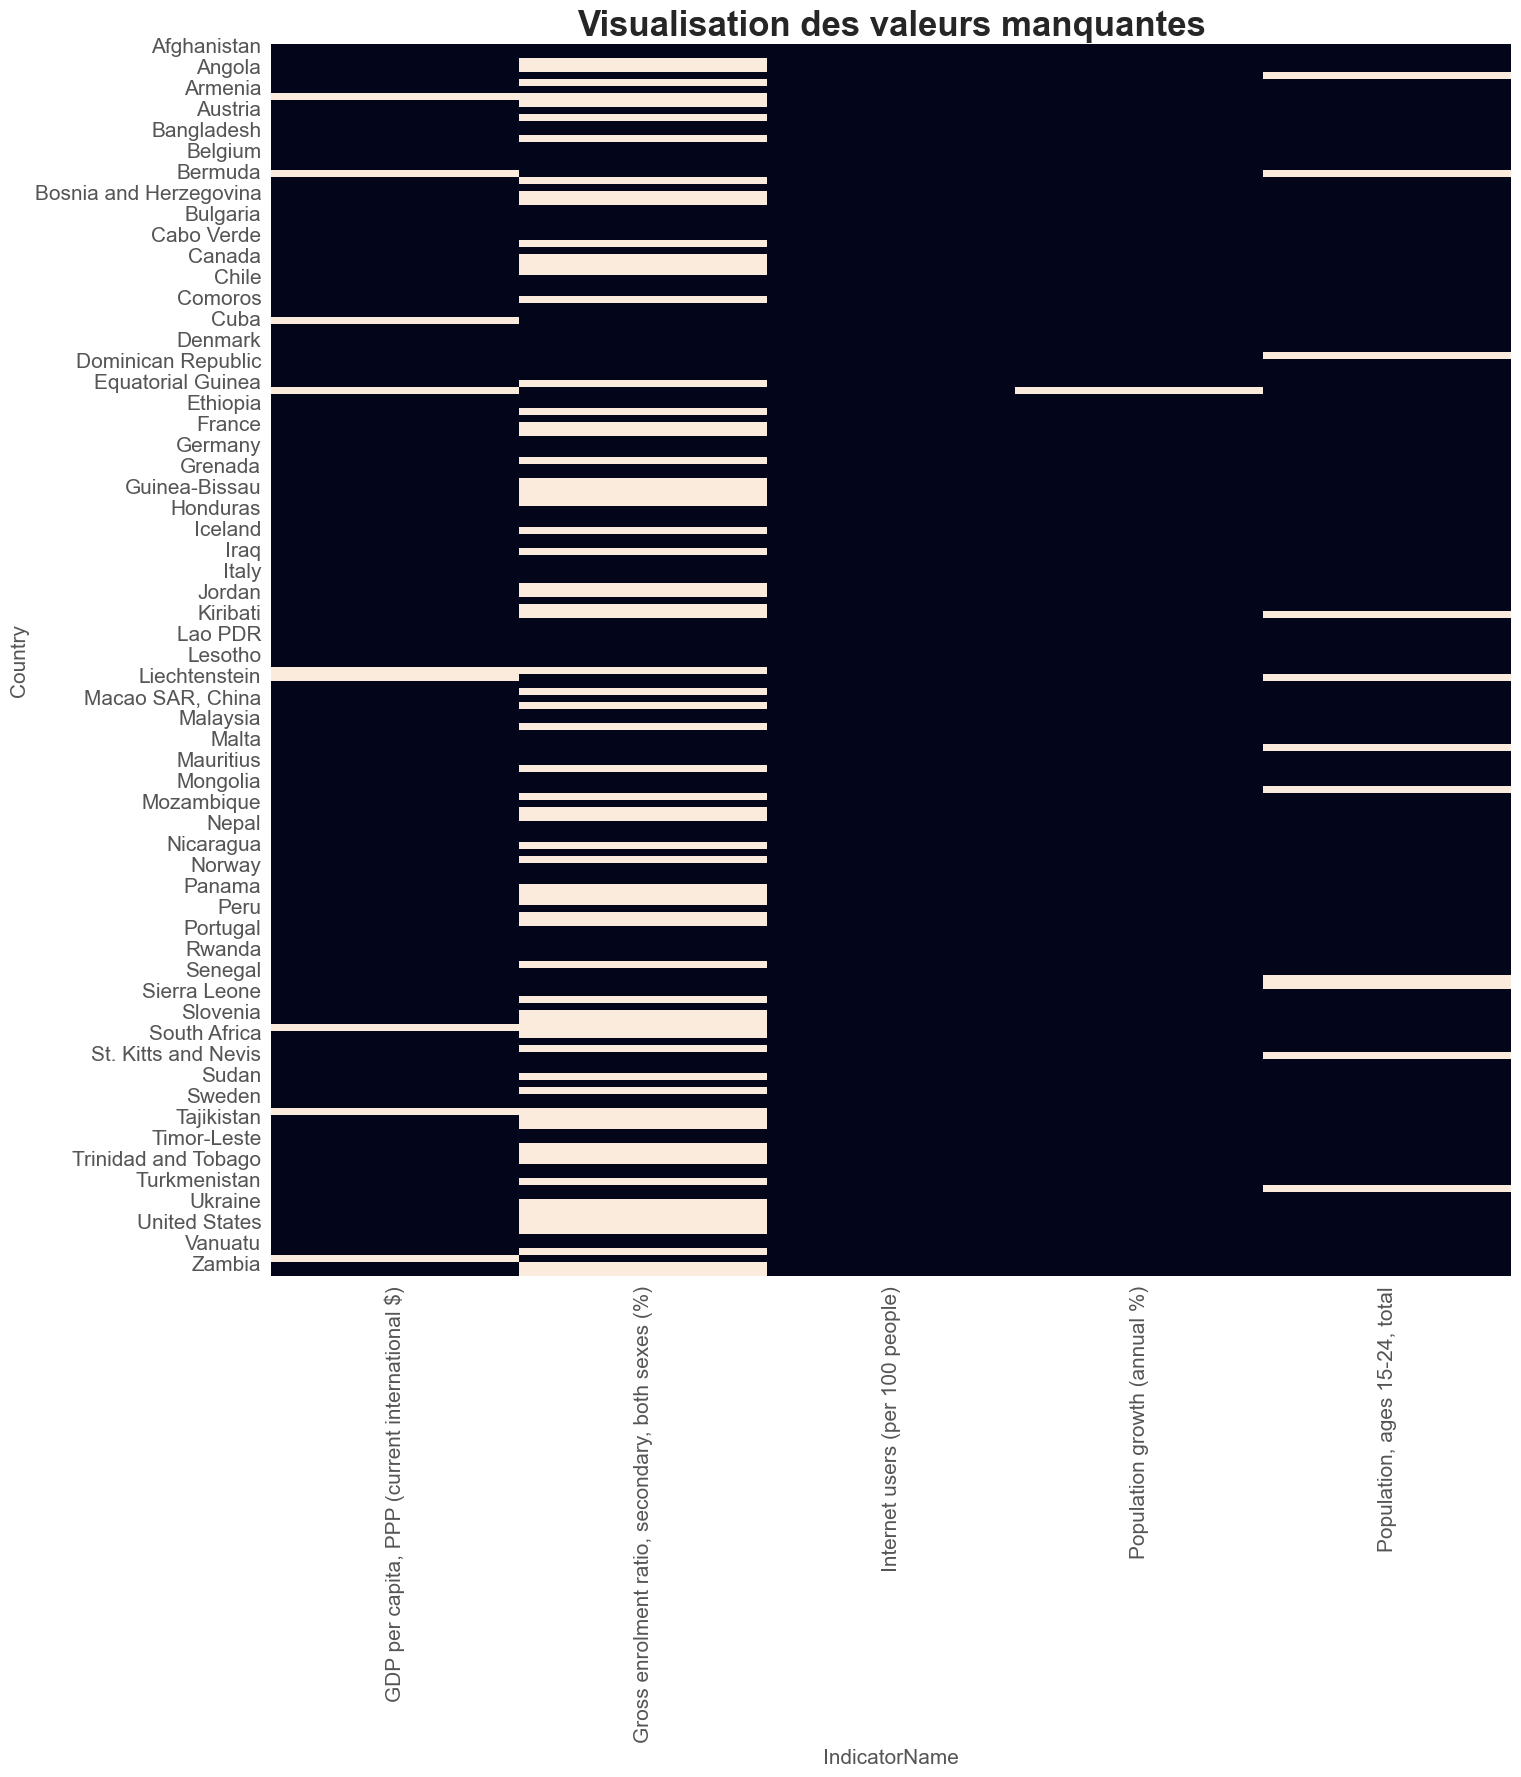

In [81]:
heatmap_values(df_final)

- Manque de données pour certains pays pour la variable : Gross enrolment ratio, secondary, both sexes (%)

In [82]:
df_final.shape

(176, 5)

176 pays au lieu de 214 (38 pays  supprimés)

- Inspection sur les petits pays

In [95]:
df_final.head()

IndicatorName,"GDP per capita, PPP (current international $)","Gross enrolment ratio, secondary, both sexes (%)",Internet users (per 100 people),Population growth (annual %),"Population, ages 15-24, total"
Country,,,,,
Afghanistan,1864.973641,55.644409,8.260000,2.943234,7252785.0
Albania,11449.094589,95.765488,63.252933,-0.291206,556269.0
Algeria,14643.343064,NaN,38.200000,1.919959,6467818.0
Angola,6648.124016,NaN,12.400000,3.428021,4259352.0
Antigua and Barbuda,21503.952551,102.705460,70.000000,1.054346,NaN


- Sur ces pays il y a de petits pays pauvre en poupulation et en situation économique

In [83]:
# liste de pays à exclure
listep=['Aruba','Botswana','Cabo Verde','Cambodia','Chad','Czech Republic','Cyprus','Djibouti','El Salvador,Equatorial Guinea','Fiji','Georgia','Grenada','Guatemala','Guinea-Bissau','Honduras','Kiribati','Kyrgyz Republic','Lao PDR','Latvia','Liechtenstein','Lithuania','Marshall Islands','Seychelles','St. Kitts and Nevis','St. Vincent and the Grenadine','Suriname','Swaziland','Syrian Arab Republic','Timor-Leste','Trinidad and Tobago','Qatar','West Bank and Gaza']

In [84]:
# Liste à exclure
df_final.reset_index(inplace=True)
df_final=df_final[~df_final.Country.isin(listep)]

In [85]:
df_final.Country.count()

146

- 30 pays supprimés

### Analyses univariées/bivariées

Histogramme des variables

In [101]:
for col in df_final.select_dtypes('float'):
    print(col)

GDP per capita, PPP (current international $)
Gross enrolment ratio, secondary, both sexes (%)
Internet users (per 100 people)
Population growth (annual %)
Population, ages 15-24, total


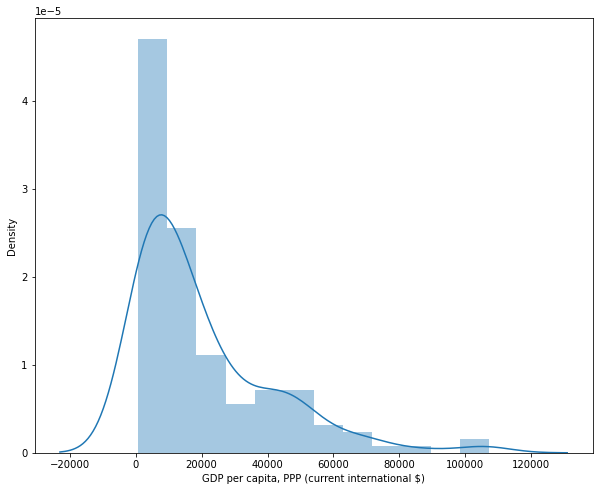

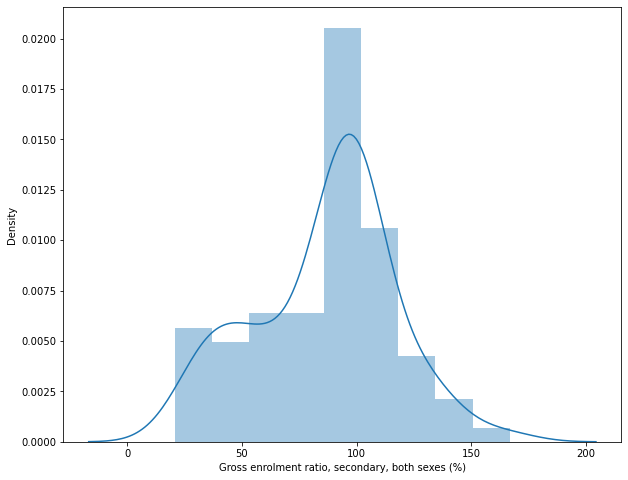

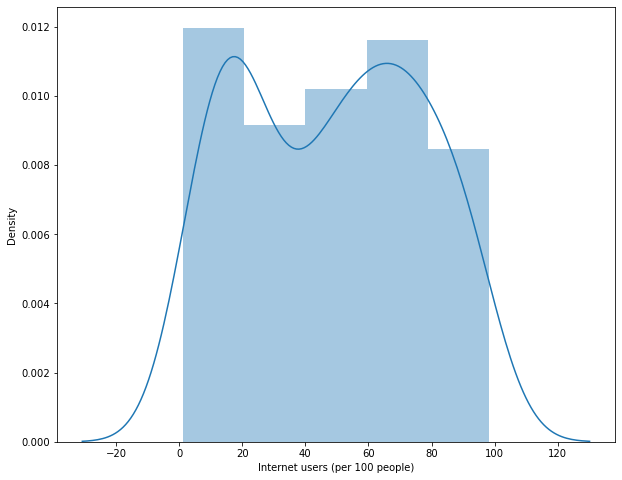

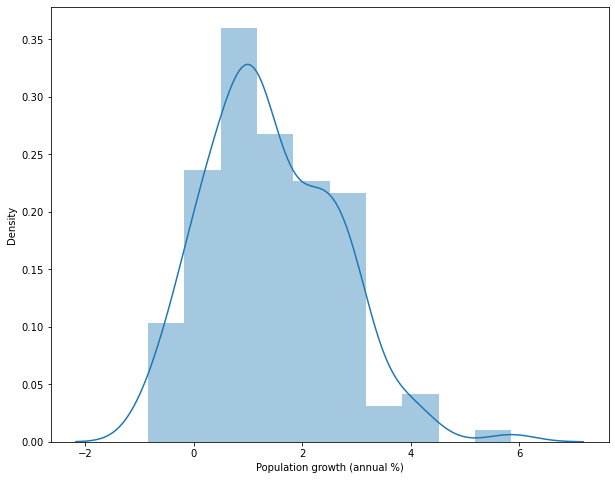

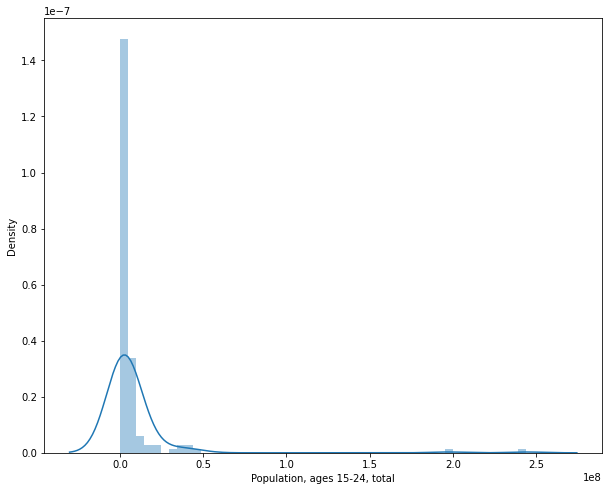

In [102]:
for col in df_final.select_dtypes('float'):
    plt.figure()
    sns.distplot(df_final[col])

- Des distributions différentes et plutot asymétriques
- Les données ne sont pas standarisés ( pas entre 0 et 1)

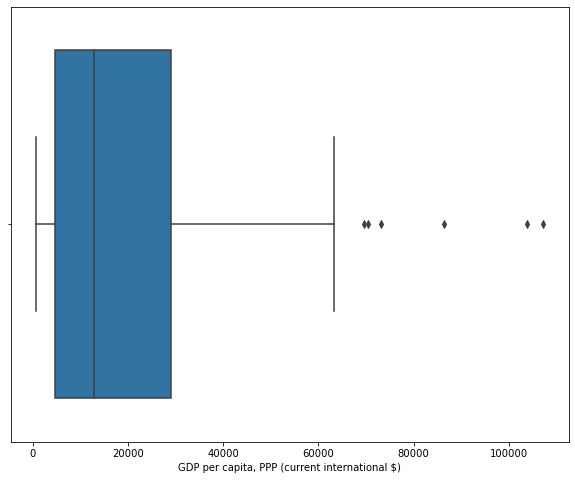

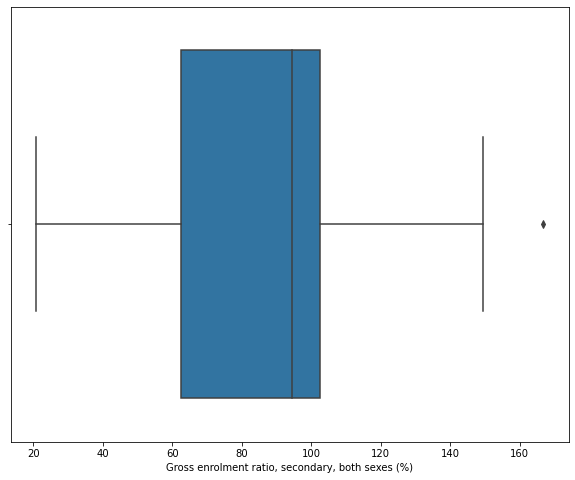

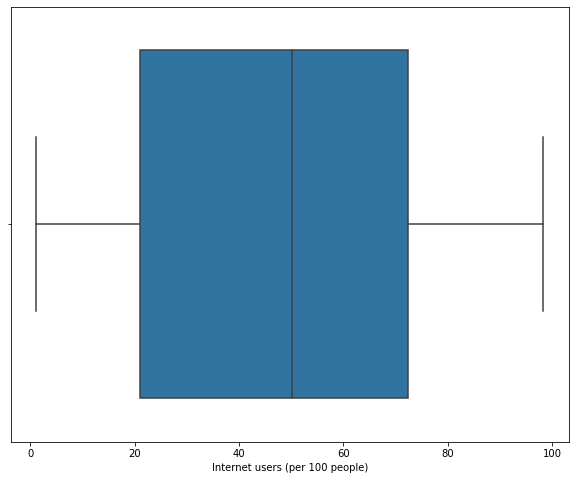

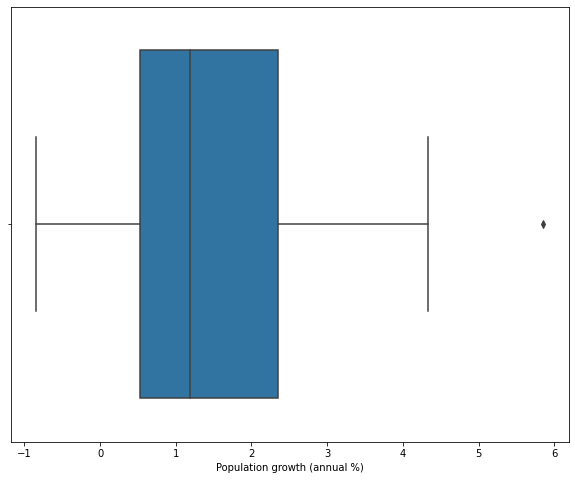

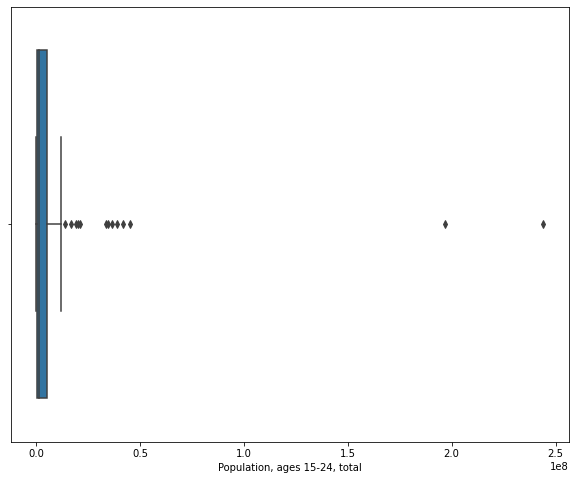

In [103]:
for col in df_final.select_dtypes('float'):
    plt.figure()
    sns.boxplot(df_final[col])

- Pour l'indicateur numérique, forme bimodale
- Présence des outliers pour les indicateurs démographiques,économique et éducatif

<AxesSubplot:xlabel='GDP per capita, PPP (current international $)', ylabel='Internet users (per 100 people)'>

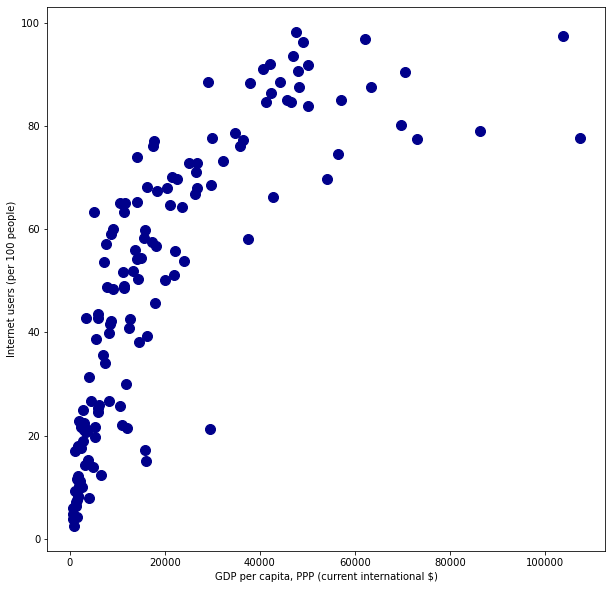

In [104]:
df_final.plot.scatter(x='GDP per capita, PPP (current international $)' , y='Internet users (per 100 people)', c='DarkBlue',s = 100,figsize=(10,10))

- L'utilisation d'intenet augmente avec l'augmentation du PIB

<AxesSubplot:xlabel='Gross enrolment ratio, secondary, both sexes (%)', ylabel='Internet users (per 100 people)'>

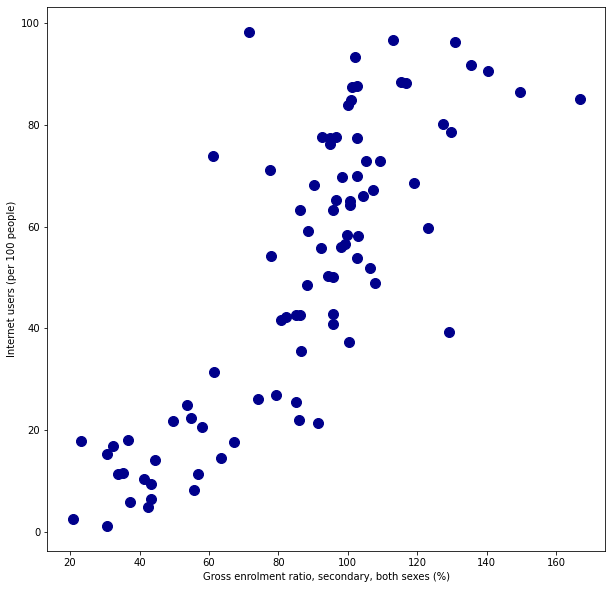

In [267]:
df_final.plot.scatter(x='Gross enrolment ratio, secondary, both sexes (%)' , y='Internet users (per 100 people)', c='DarkBlue',s = 100,figsize=(10,10))

- L'utilisation d'intenet augmente avec l'augmentation du taux de la population du secondaire

<AxesSubplot:xlabel='Population growth (annual %)', ylabel='Internet users (per 100 people)'>

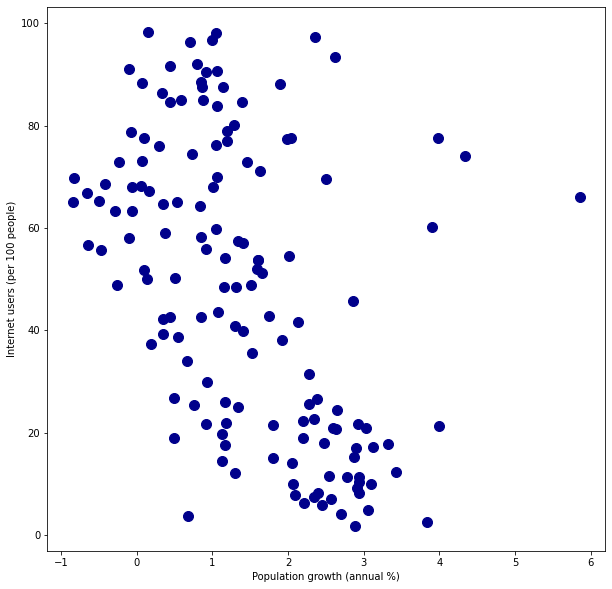

In [105]:
df_final.plot.scatter(x='Population growth (annual %)' , y='Internet users (per 100 people)', c='DarkBlue',s = 100,figsize=(10,10))

- Une relation linéaire négative : Le taux d'internet baisse quand la croissance démographique augmente. 

<AxesSubplot:xlabel='Population growth (annual %)', ylabel='Gross enrolment ratio, secondary, both sexes (%)'>

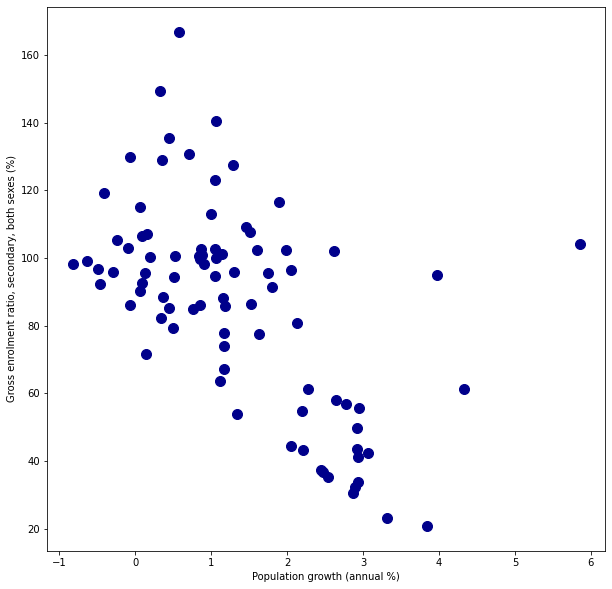

In [106]:
df_final.plot.scatter(x='Population growth (annual %)' , y='Gross enrolment ratio, secondary, both sexes (%)', c='DarkBlue',s = 100,figsize=(10,10))

- Une relation linéaire négative : Le taux des gens en secondaire baisse quand la croissance démographique augmente. 

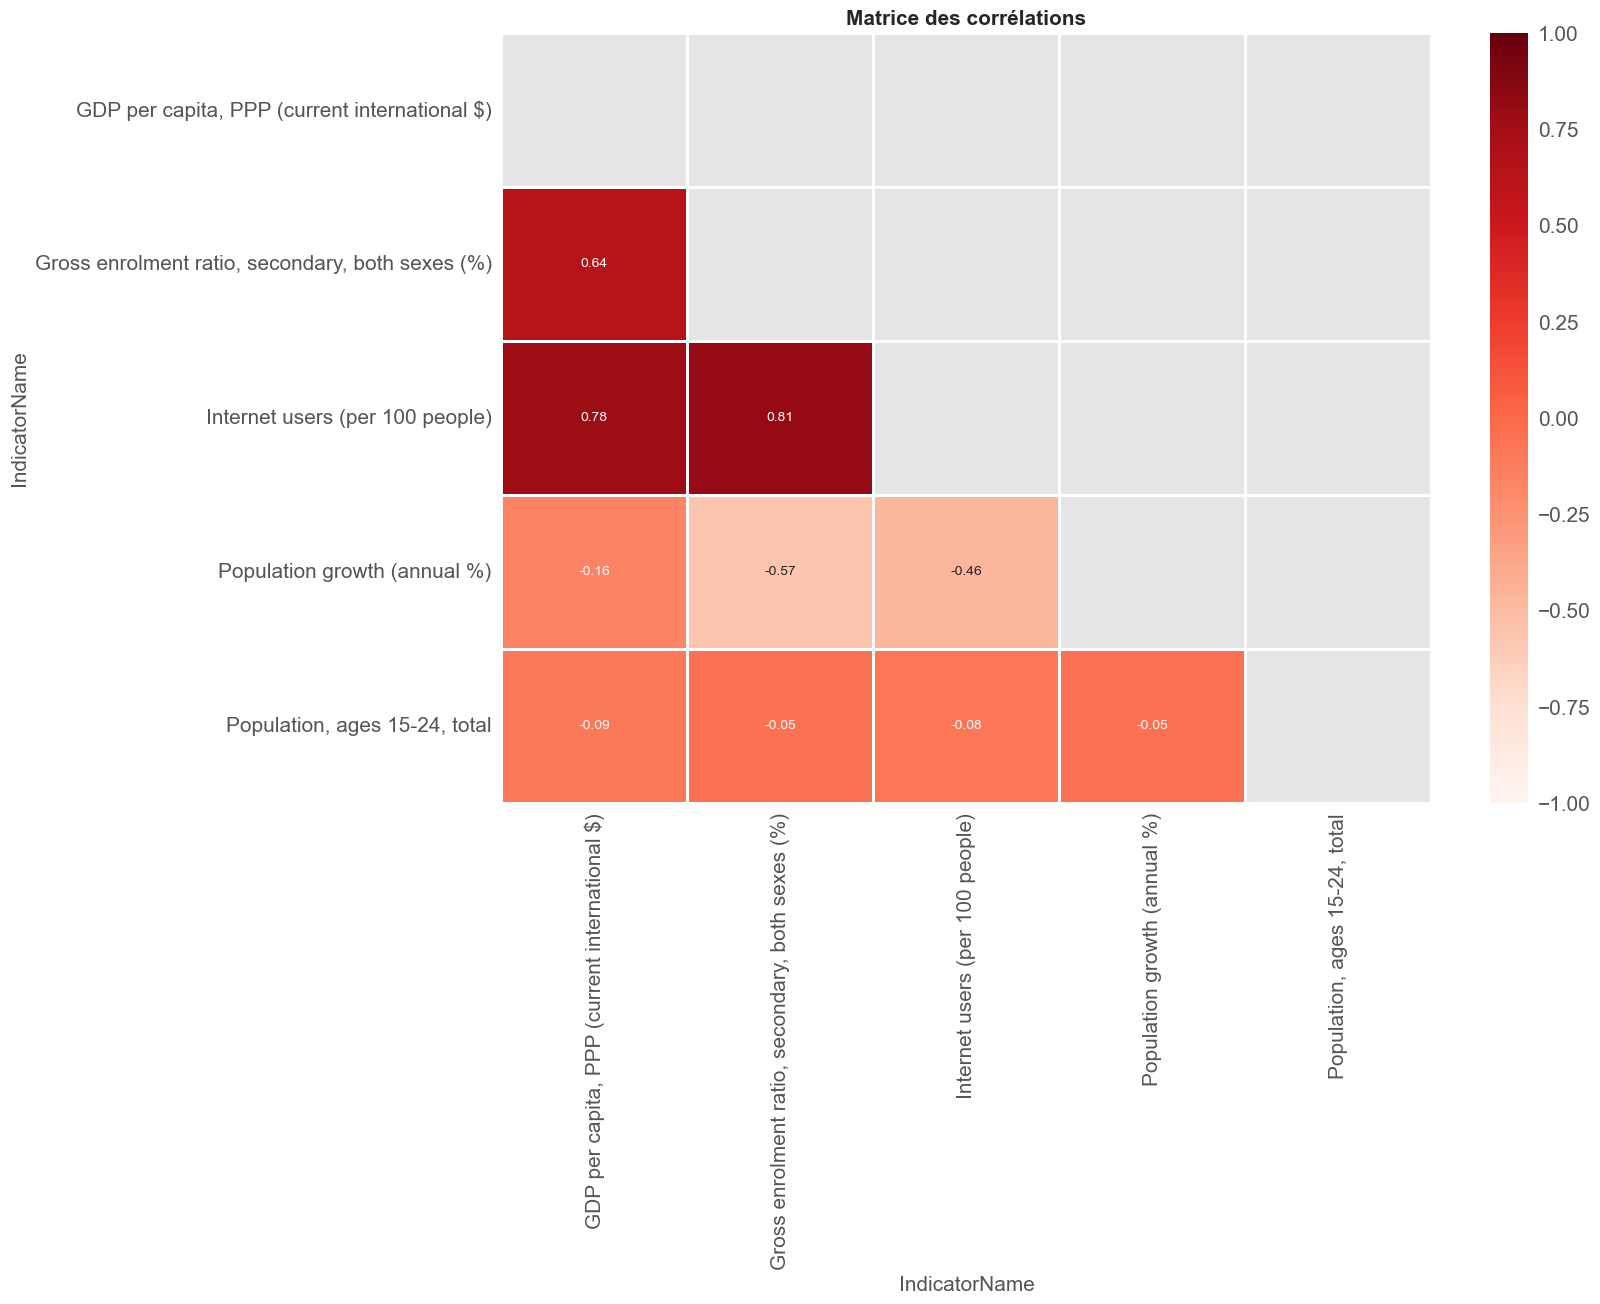

In [86]:
correlation_matrix(df_final)

- Présentation des données par région : 

In [88]:
df_final=pd.merge(EdStatsCountry,df_final, on='Country',how='inner')

<AxesSubplot:title={'center':'GDP per capita, PPP (current international $)'}, xlabel='Region'>

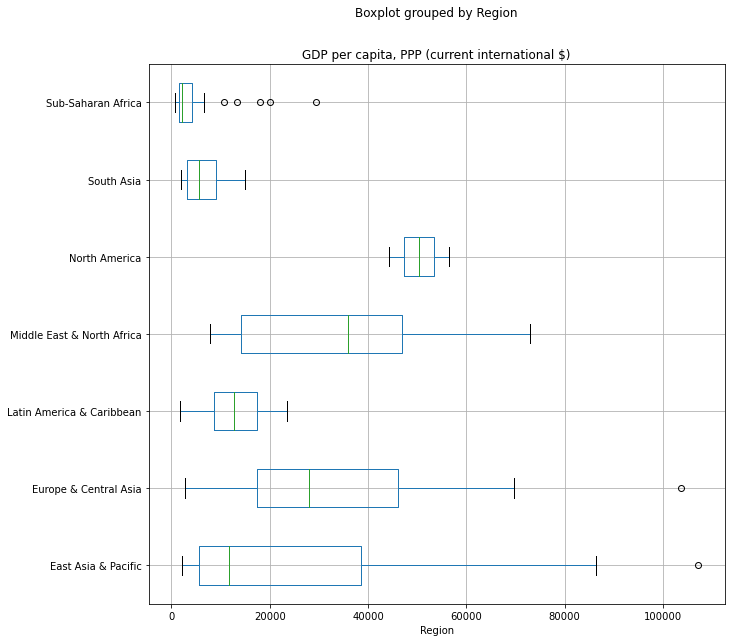

In [110]:
df_final.boxplot(column="GDP per capita, PPP (current international $)",by="Region", vert=False,figsize=(10,10))

<AxesSubplot:title={'center':'Internet users (per 100 people)'}, xlabel='Region'>

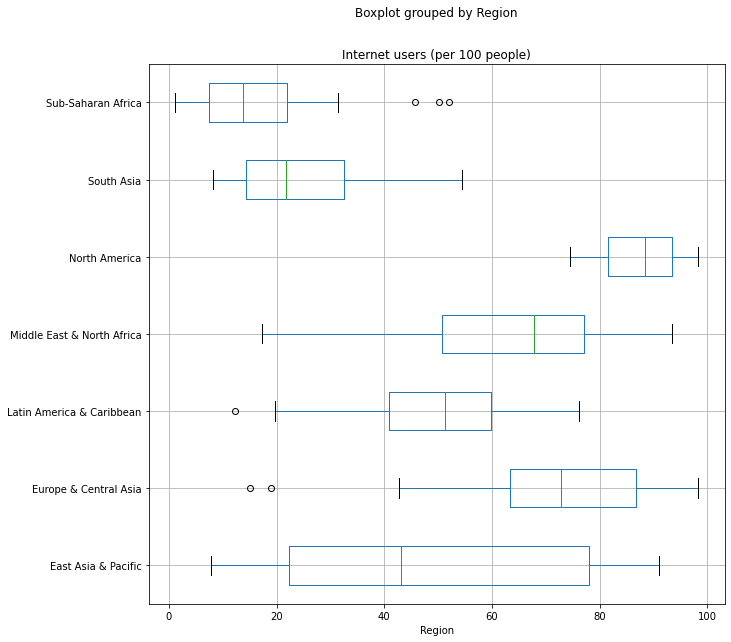

In [111]:
df_final.boxplot(column='Internet users (per 100 people)',by="Region", vert=False,figsize=(10,10))

- Des distributions différentes

<AxesSubplot:xlabel='Region'>

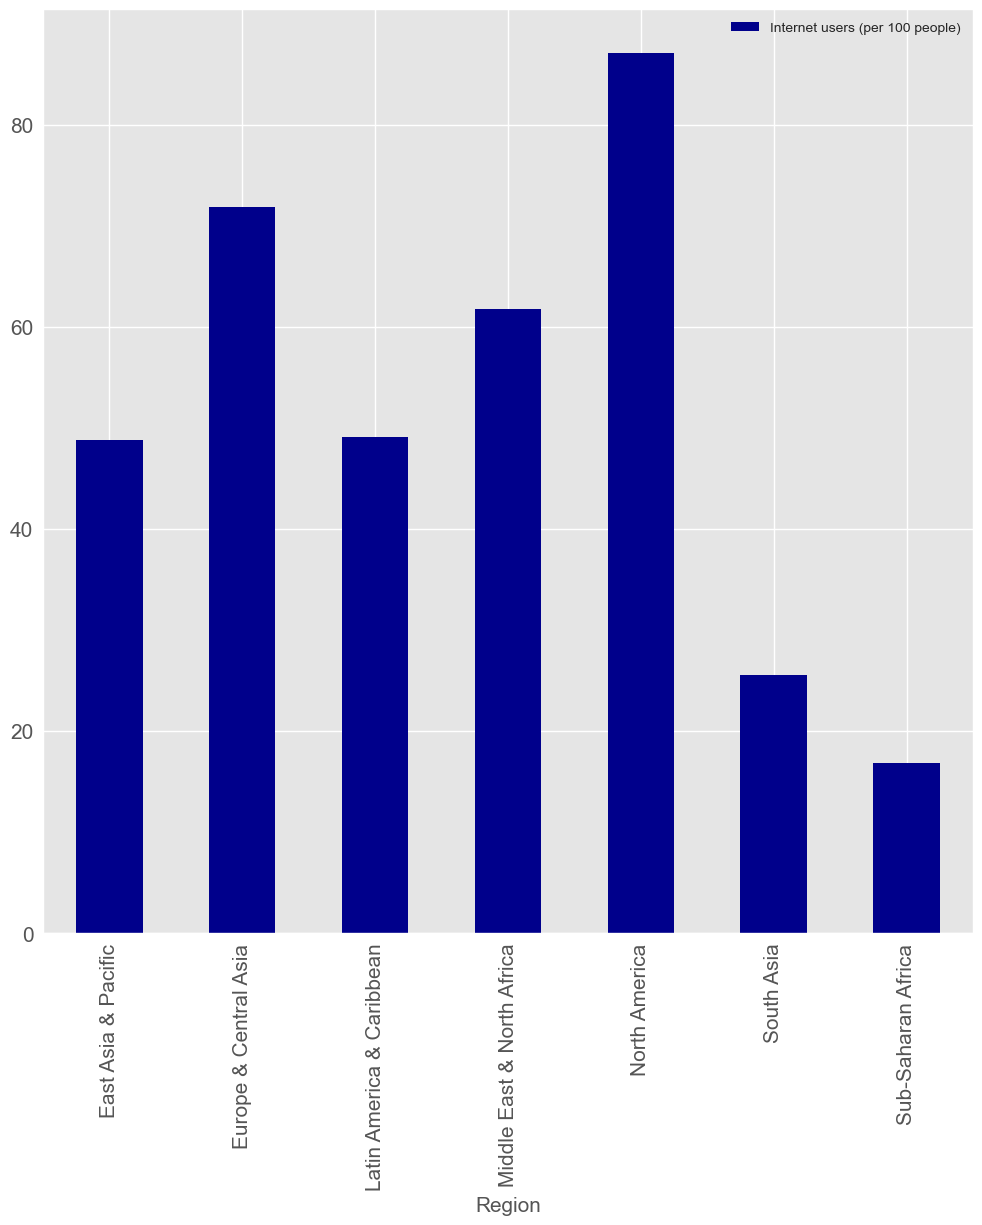

In [89]:
df_final.groupby(['Region'])[['Internet users (per 100 people)']].mean().plot(figsize=(12,12),kind='bar',color='darkblue')

<AxesSubplot:xlabel='Region'>

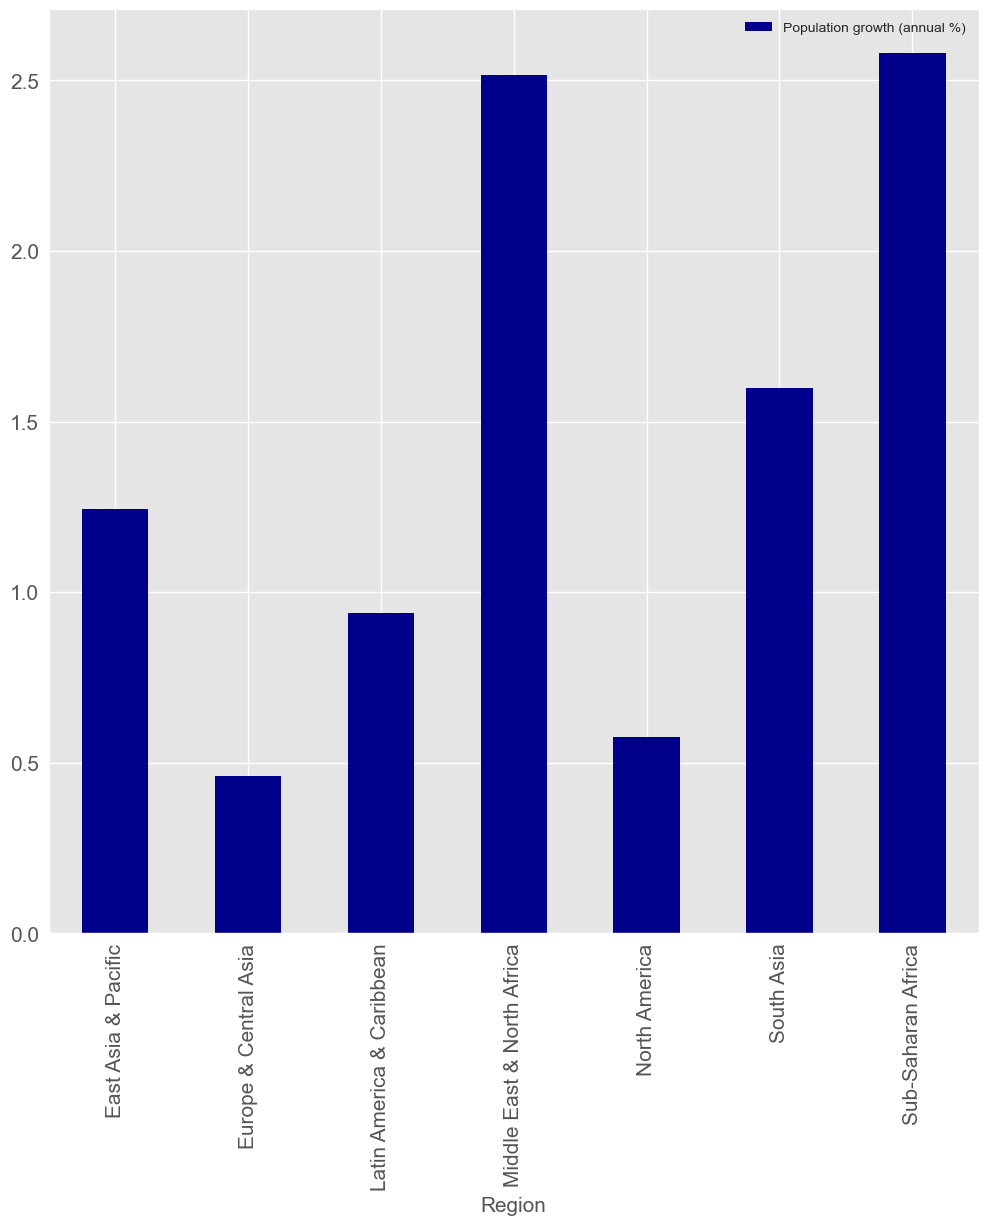

In [90]:
df_final.groupby(['Region'])[['Population growth (annual %)']].mean().plot(figsize=(12,12),kind='bar',color='darkblue')

Déterminer les ordres de grandeurs des indicateurs statistiques classiques pour les différentes régions (moyenne/médiane/écart-type )

In [91]:
df_stat=df_final.groupby(['Region']).agg(['mean','median','std'])
df_stat

GDP per capita, PPP (current international $)  \
                                                                    mean   
Region                                                                     
East Asia & Pacific                                         24974.063347   
Europe & Central Asia                                       32119.209780   
Latin America & Caribbean                                   13254.789307   
Middle East & North Africa                                  33288.285167   
North America                                               50336.977776   
South Asia                                                   6730.240971   
Sub-Saharan Africa                                           4751.839963   

                                                        \
                                  median           std   
Region                                                   
East Asia & Pacific         11618.692869  29623.490087   
Europe & Central Asia       27970.431402  20671.800563   
Latin America & Caribbean   12654.814554   5824.463835   
Middle East & North Africa  35875.525664  23114.229630   
North America               50336.977776   8672.001679   
South Asia                   5574.592531   4664.312709   
Sub-Saharan Africa           2083.928648   6392.417475   

                           Gross enrolment ratio, secondary, both sexes (%)  \
                                                                       mean   
Region                                                                        
East Asia & Pacific                                               92.547662   
Europe & Central Asia                                            110.475726   
Latin America & Caribbean                                         95.415180   
Middle East & North Africa                                        92.575291   
North America                                                     71.542412   
South Asia                                                        60.966772   
Sub-Saharan Africa                                                43.486500   

                                                   \
                                median        std   
Region                                              
East Asia & Pacific          91.462334  19.459824   
Europe & Central Asia       102.783928  20.057799   
Latin America & Caribbean    98.871414  12.482621   
Middle East & North Africa   94.972649  14.939642   
North America                71.542412        NaN   
South Asia                   63.524529  11.321597   
Sub-Saharan Africa           41.307480  17.029357   

                           Internet users (per 100 people)             \
                                                      mean     median   
Region                                                                  
East Asia & Pacific                              48.771558  43.100000   
Europe & Central Asia                            71.839491  72.867350   
Latin America & Caribbean                        49.074136  51.205425   
Middle East & North Africa                       61.781286  67.875024   
North America                                    87.115937  88.470000   
South Asia                                       25.561539  21.790809   
Sub-Saharan Africa                               16.859798  13.799563   

                                      Population growth (annual %)            \
                                  std                         mean    median   
Region                                                                         
East Asia & Pacific         28.166947                     1.242677  1.183695   
Europe & Central Asia       19.117330                     0.461912  0.348956   
Latin America & Caribbean   15.928582                     0.939486  1.009855   
Middle East & North Africa  23.742507                     2.516295  2.242713   
North America               11.942416                     0.576288  0.72

- Scoring :
- Avant de faire le scoring :
-- Imputer les données
-- Standariser les données

In [94]:
# Indicateurs à garder pour les années de 2000 à 2015 
indic=['GDP per capita, PPP (current international $)','Gross enrolment ratio, secondary, both sexes (%)','Internet users (per 100 people)','Population growth (annual %)','Population, ages 15-24, total']

In [92]:
df2=pd.merge(EdStatsCountry,EdStatsData, on='Country',how='inner')
df2=df2.rename(columns={"Indicator Name":"IndicatorName"})

In [95]:
df2=df2[df2.IndicatorName.isin(indic)]
pays=df_final.Country.to_list()
df2=df2[df2.Country.isin(pays)]

In [96]:
# Je crée une colonne pour compter le taux de valeurs manquantes par lignes (pour toutes les années)
df2['TAUX_NAN']=(df2.isna().sum(axis=1)/16 * 100)

In [97]:
# Je supprime les lignes avec  40% 

df2.drop( df2[ df2['TAUX_NAN'] >= 40.0 ].index, inplace=True)

In [98]:
del df2["TAUX_NAN"]

- Imputer les données pour faire le scoring

In [99]:
# Définir les colonnes à interpoler
col_interpolate=df2.columns[3:19].tolist()
#  Variables quantitatives
df_numeric = df2[col_interpolate]
# Variables qualitatives
df_categ = df2.loc[:, ['Country', 'IndicatorName','Region']]
# Je remplis 
df_numeric.fillna(method='ffill', axis=1, inplace=True)
df2 = pd.concat([df_categ, df_numeric], axis=1)

In [100]:
df2.head()

,Country,IndicatorName,Region,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
12,Afghanistan,"GDP per capita, PPP (current international $)",South Asia,NaN,NaN,8.755176e+02,9.228294e+02,9.163345e+02,1.011596e+03,1.065620e+03,1.210479e+03,1.247066e+03,1.482099e+03,1.581601e+03,1.660740e+03,1.873154e+03,1.877412e+03,1.875447e+03,1.864974e+03
14,Afghanistan,"Gross enrolment ratio, secondary, both sexes (%)",South Asia,NaN,1.304874e+01,1.304874e+01,1.331708e+01,1.866479e+01,1.978370e+01,2.993046e+01,3.008316e+01,4.022338e+01,4.673276e+01,5.324683e+01,5.461618e+01,5.667734e+01,5.668866e+01,5.565616e+01,5.564441e+01
15,Afghanistan,Internet users (per 100 people),South Asia,NaN,4.722568e-03,4.561395e-03,8.789125e-02,1.058090e-01,1.224148e+00,2.107124e+00,1.900000e+00,1.840000e+00,3.550000e+00,4.000000e+00,5.000000e+00,5.454545e+00,5.900000e+00,7.000000e+00,8.260000e+00
17,Afghanistan,Population growth (annual %),South Asia,3.494659e+00,4.251504e+00,4.720528e+00,4.818041e+00,4.468918e+00,3.870470e+00,3.228630e+00,2.755225e+00,2.512574e+00,2.569114e+00,2.812617e+00,3.095119e+00,3.272703e+00,3.315224e+00,3.183201e+00,2.943234e+00
18,Afghanistan,"Population, ages 15-24, total",South Asia,3.979438e+06,4.122669e+06,4.293057e+06,4.486256e+06,4.694142e+06,4.910340e+06,5.134377e+06,5.367499e+06,5.606736e+06,5.848604e+06,6.090239e+06,6.330684e+06,6.569239e+06,6.803785e+06,7.032072e+06,7.252785e+06


### Scoring

- Donner un score pour chaque indicateur  sur l'année 2015 : 
- un score entre 0 et 1 pour noter le critère 
- Je commence par standariser les données

In [101]:
# Reformater le dataframe pour avoir l'année 2015
df_2015=pd.pivot_table(df2, values='2015', index=['Country'], columns=['IndicatorName'])
df_2015.head()

IndicatorName,"GDP per capita, PPP (current international $)","Gross enrolment ratio, secondary, both sexes (%)",Internet users (per 100 people),Population growth (annual %),"Population, ages 15-24, total"
Country,,,,,
Afghanistan,1864.973641,55.644409,8.260000,2.943234,7252785.0
Albania,11449.094589,95.765488,63.252933,-0.291206,556269.0
Algeria,14643.343064,99.860191,38.200000,1.919959,6467818.0
Angola,6648.124016,NaN,12.400000,3.428021,4259352.0
Antigua and Barbuda,21503.952551,NaN,70.000000,1.054346,NaN


In [102]:
# On ne conserve que les pays avec les 5 indicateurs renseignés

df_2015['NB_NAN']=df_2015.isna().sum(axis=1)*100 / 5

In [103]:
df_2015[df_2015['NB_NAN']>=10.0]

IndicatorName,"GDP per capita, PPP (current international $)","Gross enrolment ratio, secondary, both sexes (%)",Internet users (per 100 people),Population growth (annual %),"Population, ages 15-24, total",NB_NAN
Country,,,,,,
Angola,6648.124016,NaN,12.400000,3.428021,4259352.0,20.0
Antigua and Barbuda,21503.952551,NaN,70.000000,1.054346,NaN,40.0
Armenia,8744.501489,NaN,59.102378,0.368528,446958.0,20.0
Azerbaijan,17816.547122,NaN,77.000000,1.191210,1544146.0,20.0
Belarus,18382.758750,NaN,67.300000,0.159301,1072048.0,20.0
Benin,2120.171638,NaN,11.254988,2.772978,2263486.0,20.0
Bermuda,52436.056406,71.542412,98.323610,0.147377,NaN,20.0
Bosnia and Herzegovina,11713.009093,NaN,65.065503,-0.845996,489754.0,20.0
Central African Republic,668.337622,NaN,3.800000,0.677772,1078382.0,20.0


In [104]:
# Je supprime les lignes avec  10% ou plus
lf=df_2015[ df_2015['NB_NAN'] >= 10.0]
print("Il y avait :",df_2015.shape[0],"pays",lf.shape[0],'ont été supprimés')
df_2015.drop( df_2015[ df_2015['NB_NAN'] >= 10.0 ].index, inplace=True)
print("Il reste",df_2015.shape[0],"pays")

Il y avait : 146 pays 43 ont été supprimés
Il reste 103 pays


In [105]:
del df_2015["NB_NAN"]

In [107]:
# Je crée un df pour le score de l'année 2015
df_score=pd.merge(df_2015,EdStatsCountry, on='Country',how='inner')
df_score.head()

,Country,"GDP per capita, PPP (current international $)","Gross enrolment ratio, secondary, both sexes (%)",Internet users (per 100 people),Population growth (annual %),"Population, ages 15-24, total",Region
0,Afghanistan,1864.973641,55.644409,8.260000,2.943234,7252785.0,South Asia
1,Albania,11449.094589,95.765488,63.252933,-0.291206,556269.0,Europe & Central Asia
2,Algeria,14643.343064,99.860191,38.200000,1.919959,6467818.0,Middle East & North Africa
3,Argentina,20379.779854,106.777901,68.043064,1.009855,6886530.0,Latin America & Caribbean
4,Australia,46475.927752,137.564789,84.560519,1.391107,2914620.0,East Asia & Pacific


- Standariser les données

In [108]:
# Avec min max
df_min_max_scaled = df_score.copy() 
  
for column in df_min_max_scaled.select_dtypes('float'): 
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) /(df_min_max_scaled[column].max() - df_min_max_scaled[column].min())     

- Je définie un coefficient pour chaque indicateur selon des pondérations différentes :

- coefficient internet : 5
- coefficient scolarisation secondaire : 4
- coefficient croissance démographique : 2
- coefficient population : 5
- coefficient PIB : 3

In [109]:
df_min_max_scaled['Score']=[( row[0] *3 + row[1] *4 + row[2] *5 + row[3] *2+ row[4] *5) 
                            for row in zip(df_min_max_scaled['GDP per capita, PPP (current international $)'], df_min_max_scaled['Gross enrolment ratio, secondary, both sexes (%)'], df_min_max_scaled['Internet users (per 100 people)'], df_min_max_scaled['Population growth (annual %)'], df_min_max_scaled['Population, ages 15-24, total'] )]

df_min_max_scaled[["Country","Score"]].sort_values(by='Score',ascending=False).head(10)

,Country,Score
52,Luxembourg,11.042934
9,Belgium,10.031827
53,"Macao SAR, China",9.873036
91,Sweden,9.805119
24,Denmark,9.748521
71,Norway,9.738752
67,Netherlands,9.616723
42,Ireland,9.574332
39,Iceland,9.559283
4,Australia,9.506725


- La liste des 20 pays les mieux classés par rapport au score

In [110]:
df_top=df_min_max_scaled.sort_values('Score', ascending=False)[['Country', 'Region','Score']].iloc[:20]
df_top

,Country,Region,Score
52,Luxembourg,Europe & Central Asia,11.042934
9,Belgium,Europe & Central Asia,10.031827
53,"Macao SAR, China",East Asia & Pacific,9.873036
91,Sweden,Europe & Central Asia,9.805119
24,Denmark,Europe & Central Asia,9.748521
71,Norway,Europe & Central Asia,9.738752
67,Netherlands,Europe & Central Asia,9.616723
42,Ireland,Europe & Central Asia,9.574332
39,Iceland,Europe & Central Asia,9.559283
4,Australia,East Asia & Pacific,9.506725


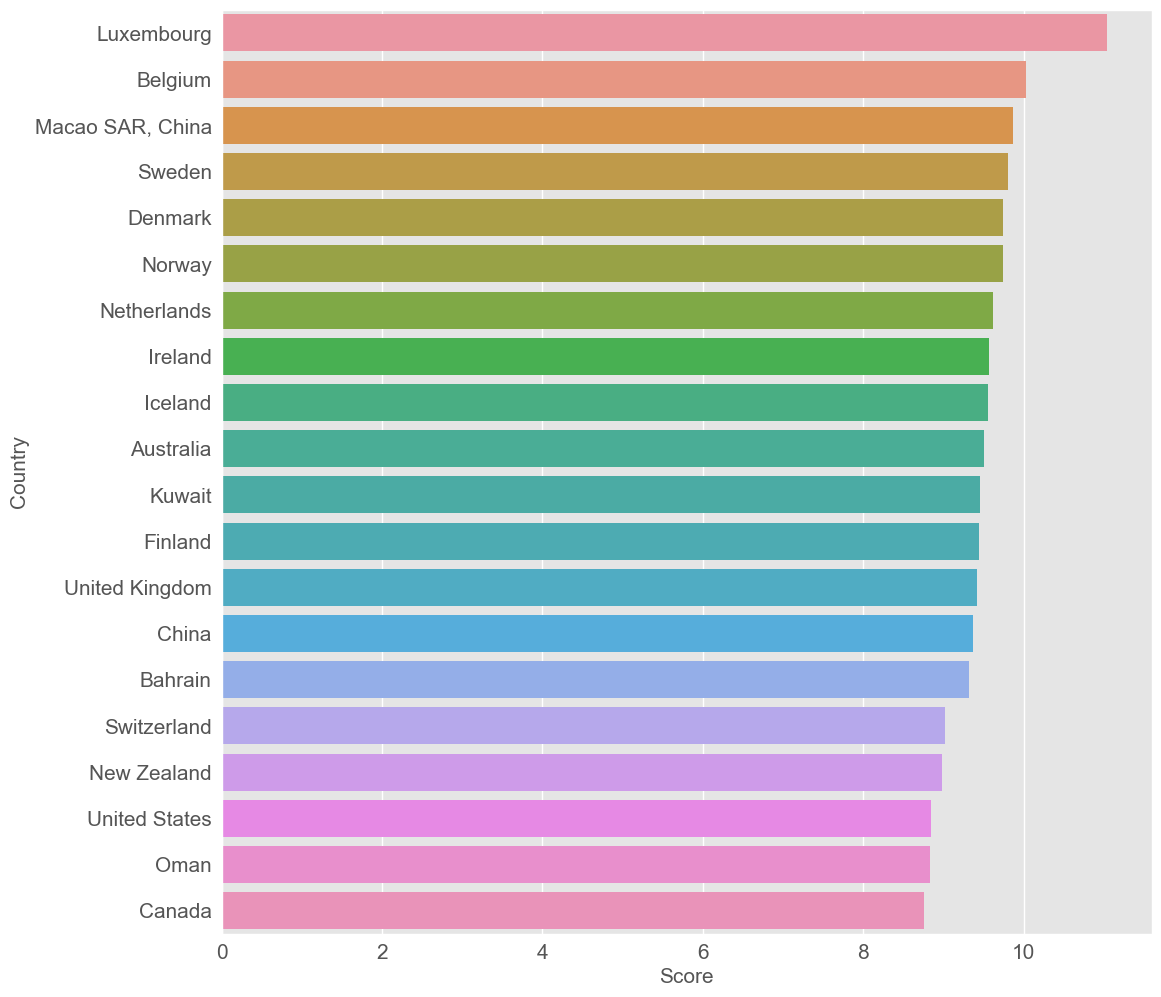

In [111]:
plt.figure(figsize=(12,12))

sns.barplot(y=df_top['Country'],x=df_top['Score']);

- Des scores assez rapprochés
- On distinguera par les moyennes de régions

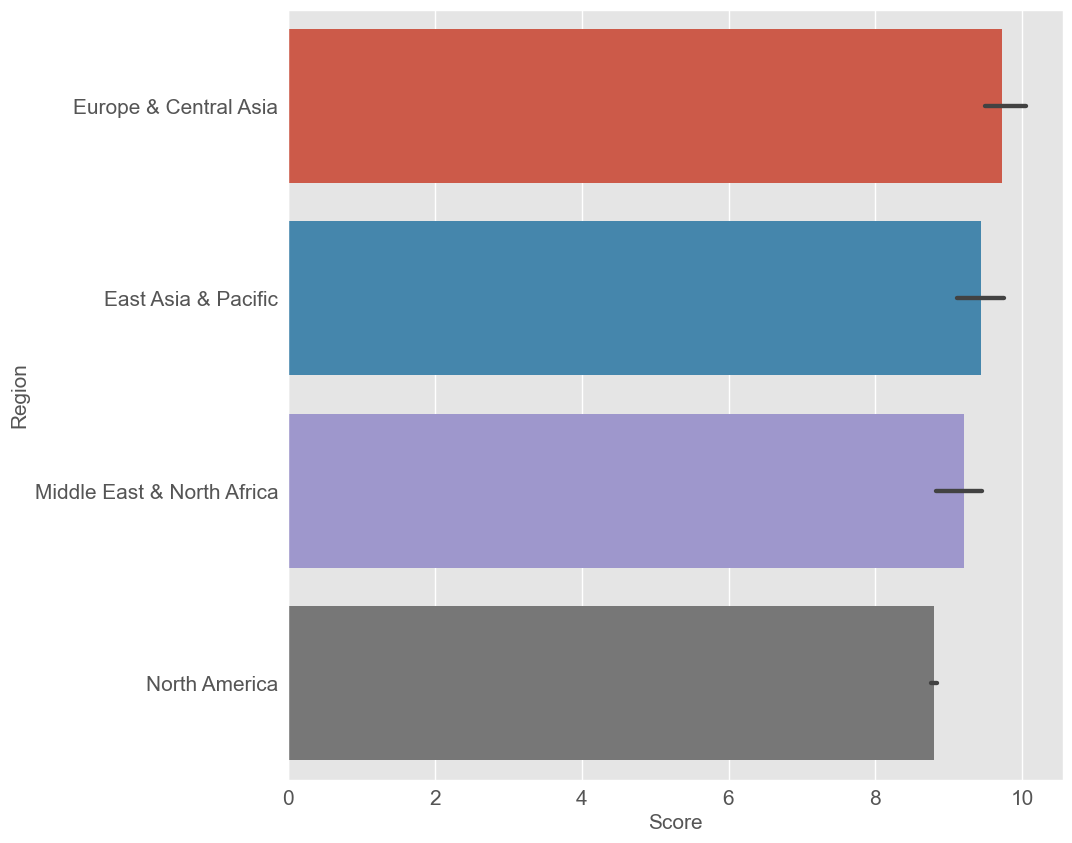

In [112]:
plt.figure(figsize=(10,10))

sns.barplot(y=df_top['Region'],x=df_top['Score']);

In [113]:
heatmap_region = pd.pivot_table(df_top, index=['Region'],aggfunc=np.mean).sort_values('Score', ascending=False)
heatmap_region

,Score
Region,
Europe & Central Asia,9.727556
East Asia & Pacific,9.432549
Middle East & North Africa,9.199551
North America,8.800218


<AxesSubplot:ylabel='Region'>

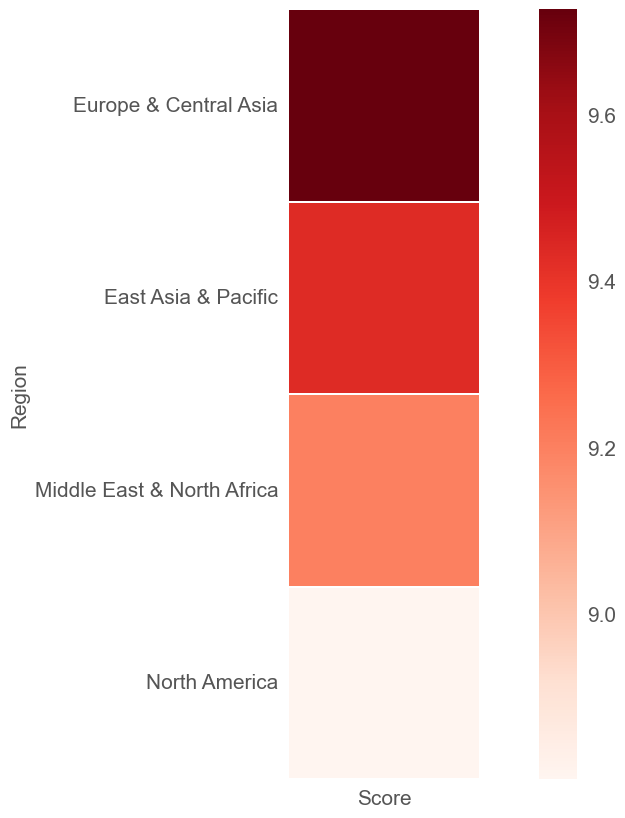

In [114]:
sns.heatmap(heatmap_region, square=True, linewidths=0.1, cmap='Reds')

- La méthode de scoring a classé en premier le pays du  Luxembourg : Europe & Central Asia	,Belgique : Europe & Central Asia	,Chine: East Asia & Pacific	,Sweden: Europe & Central Asia	 et Denmark : Europe & Central Asia	
- Le classement par région indique : la région d'Europe en premier,East Asia en deuxième et Middle East& North Africa en troisième

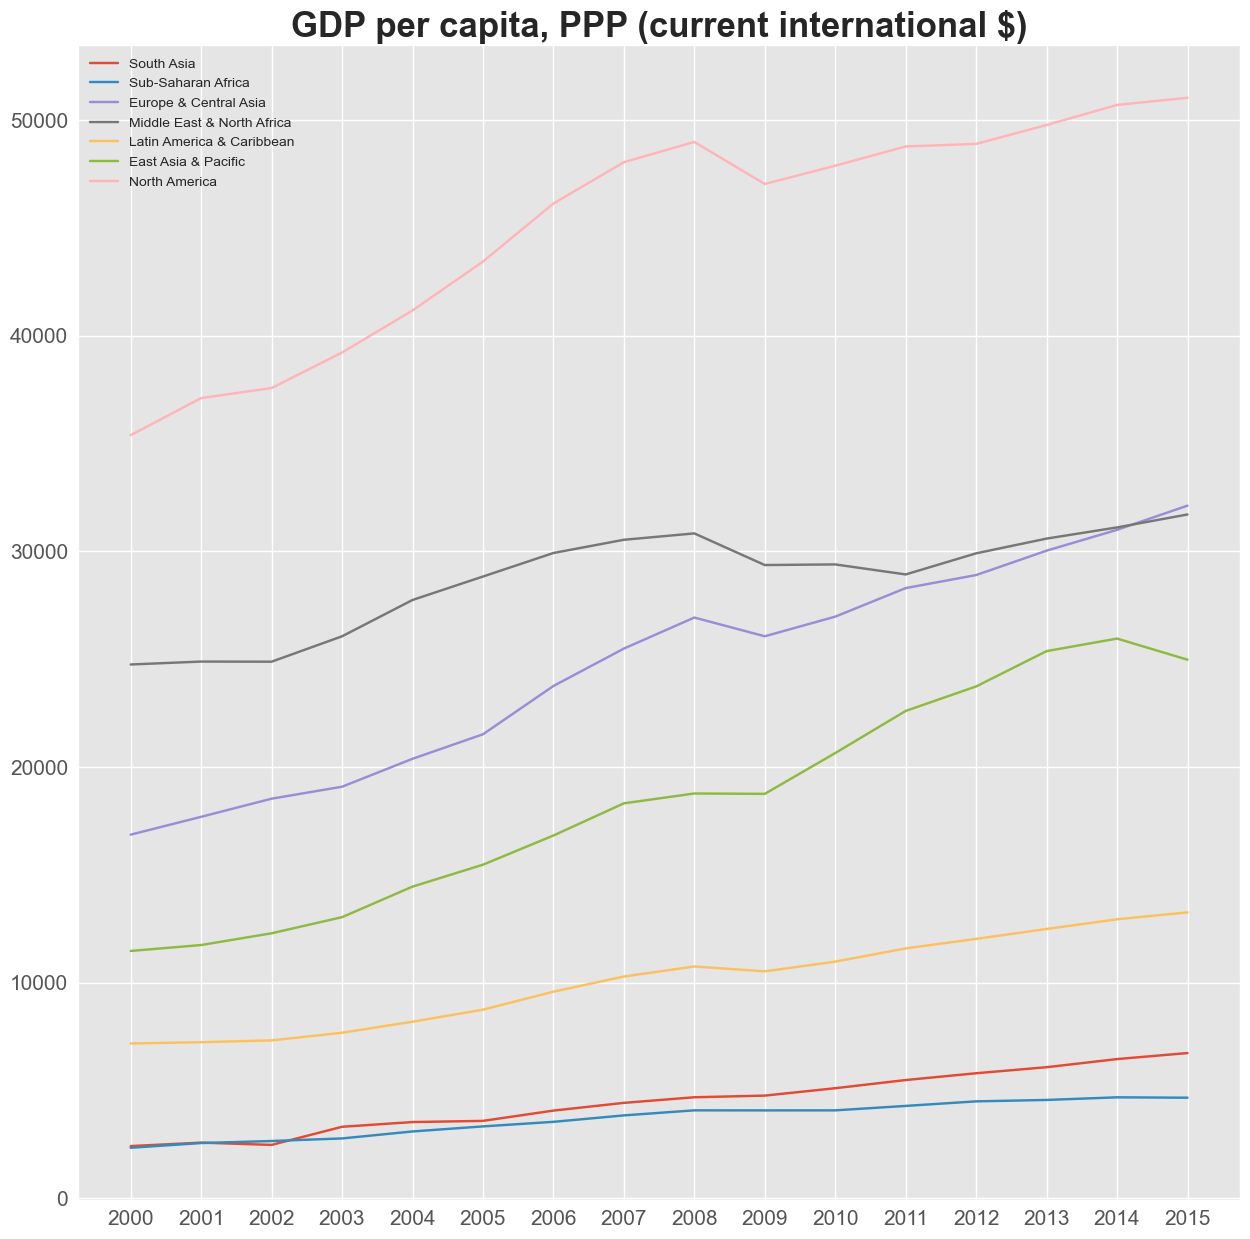

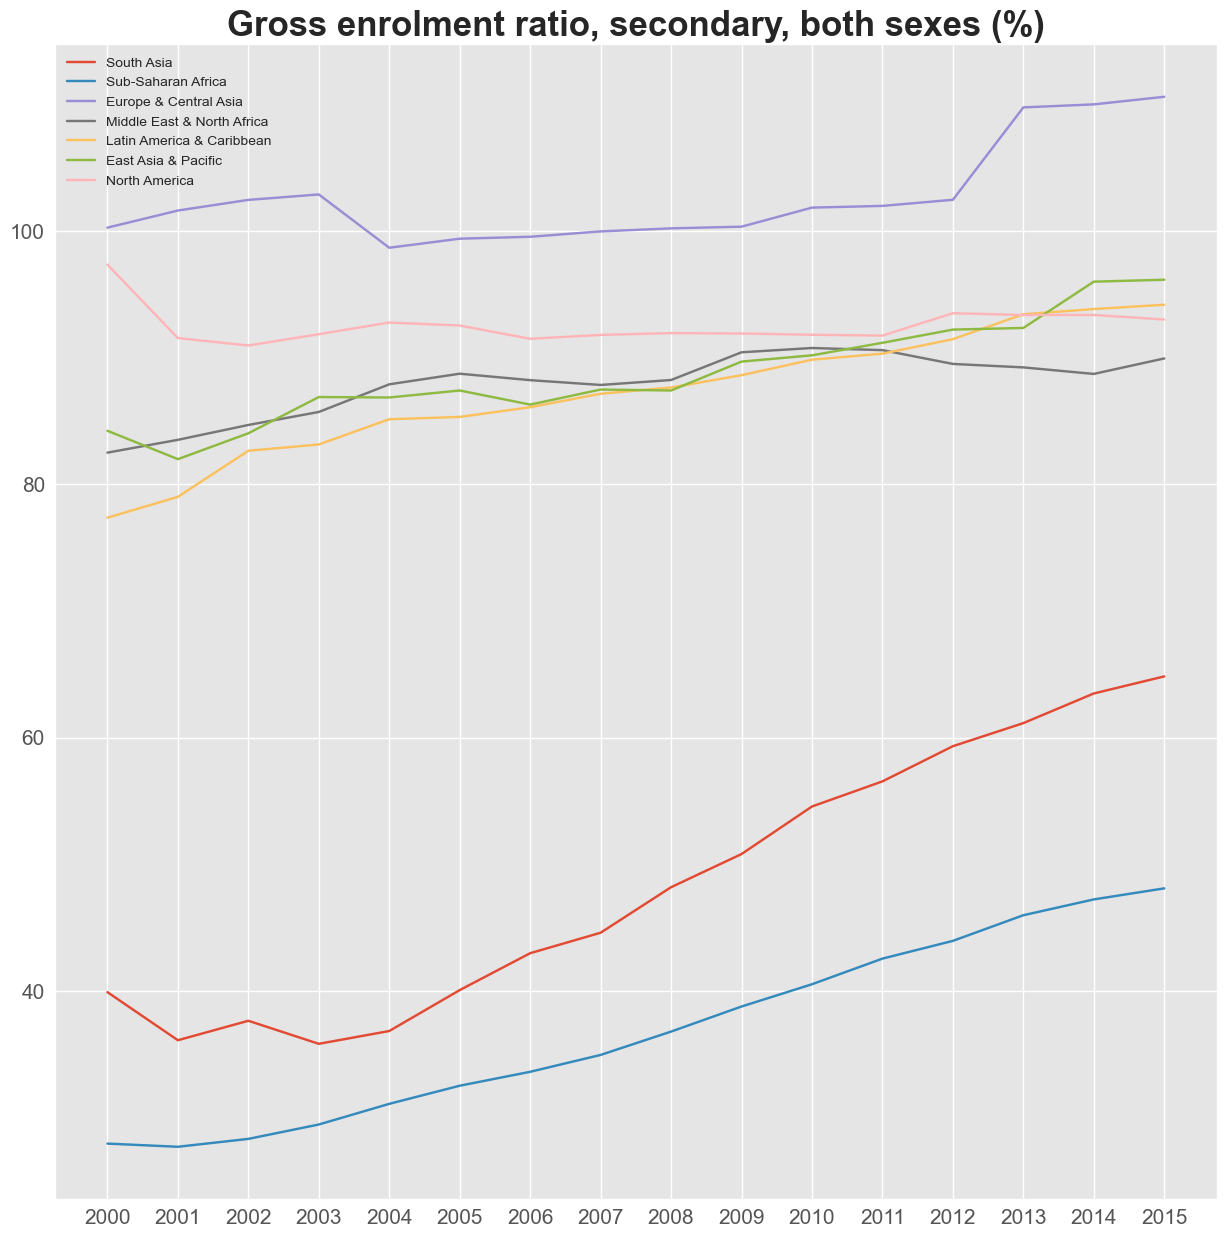

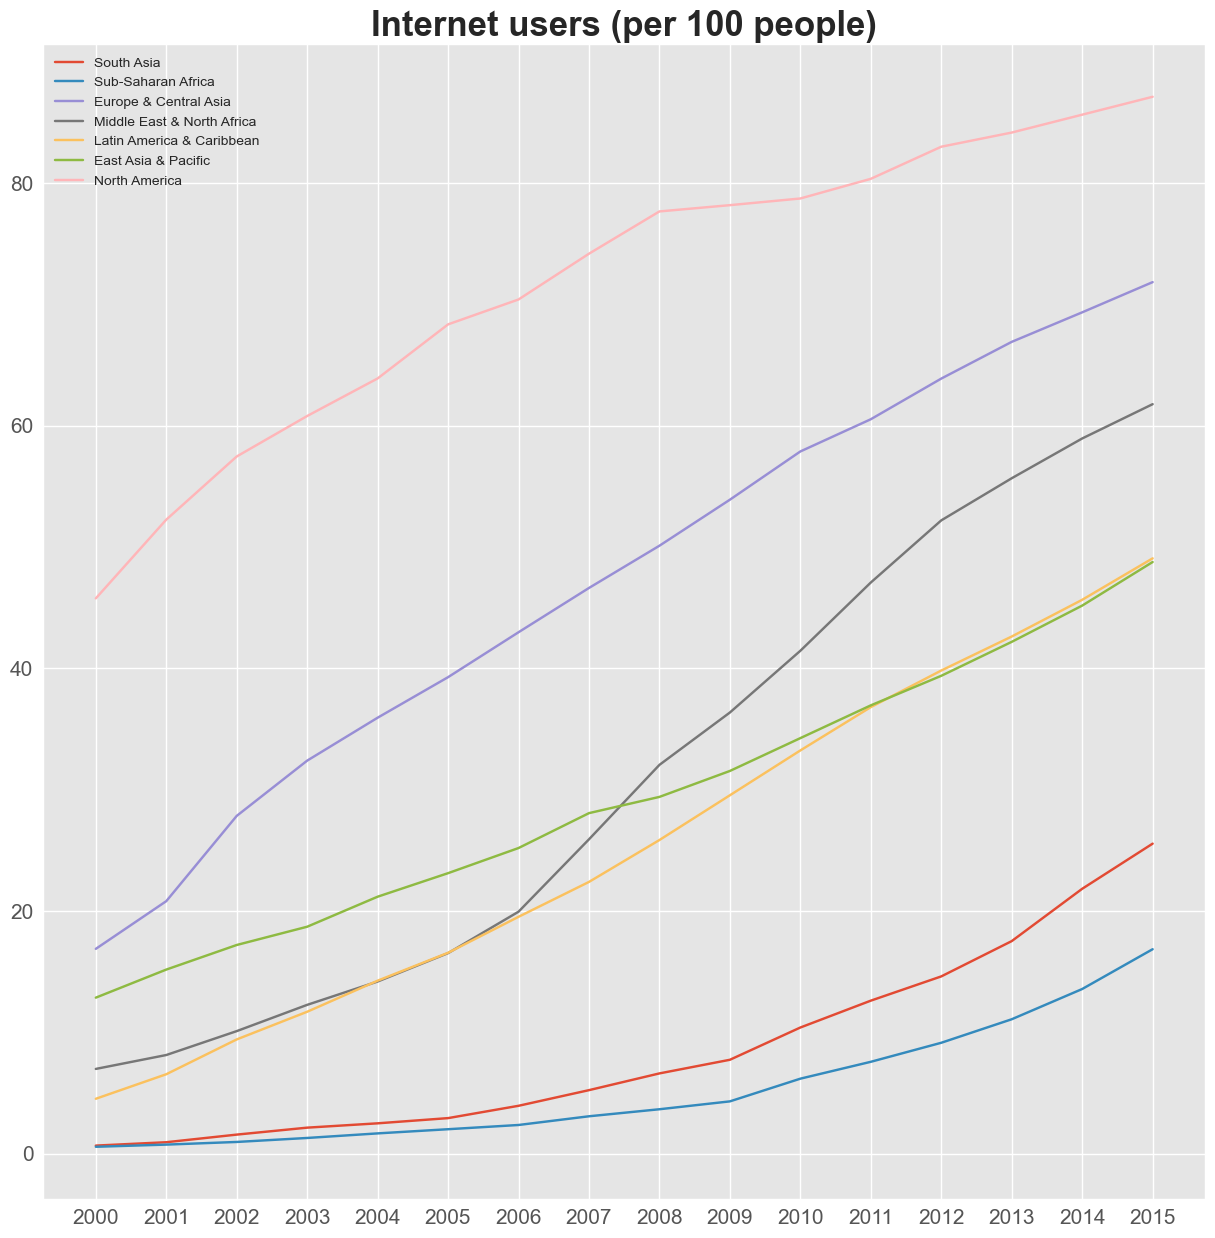

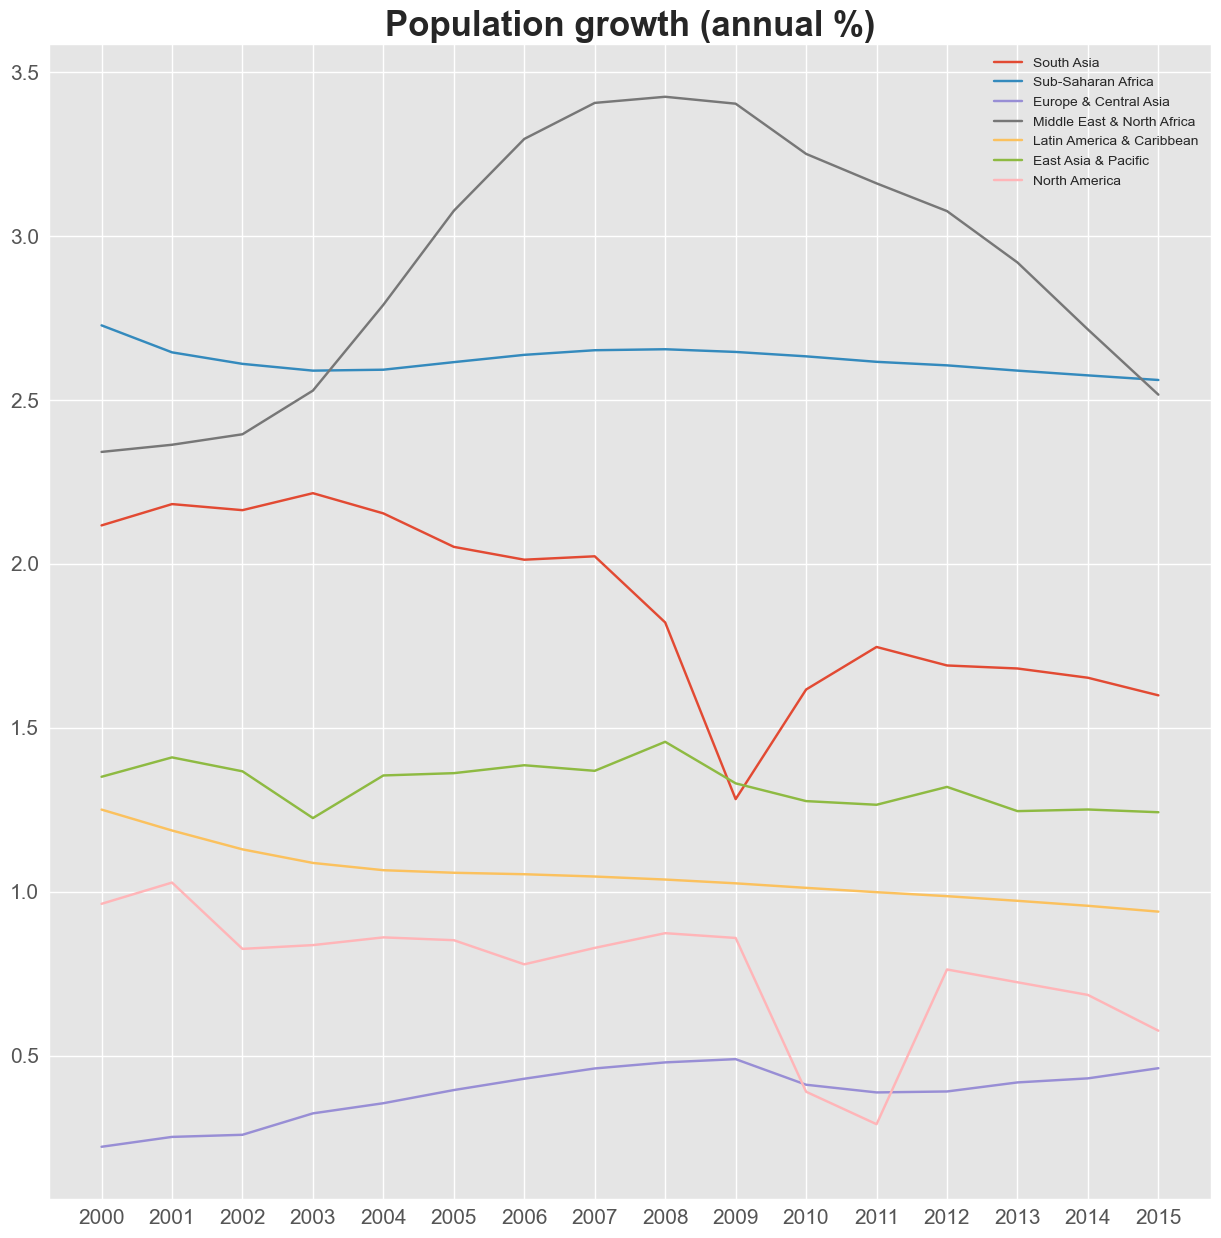

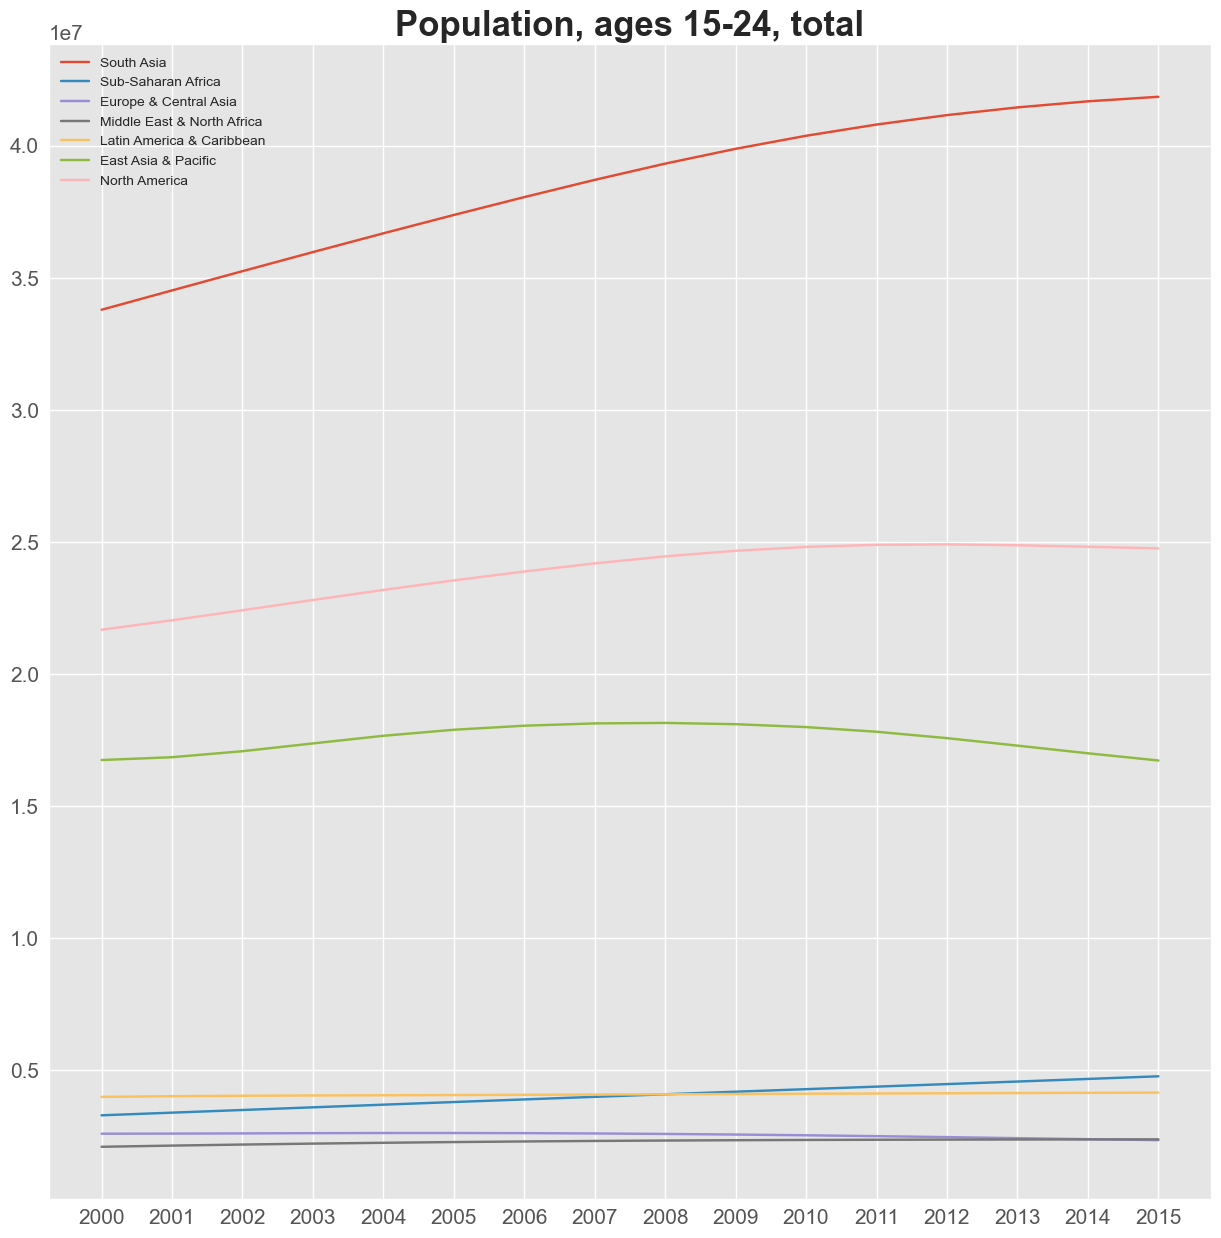

In [117]:
# Je crée un df regroupés par région et indicateur
df_mean=df2.groupby(['Region','IndicatorName']).mean(numeric_only=True)

# Selection des indicateurs unique 
indicators = df2["IndicatorName"].unique()
# Parcourir les indicateurs 
for indicator in indicators:
    
    fig = plt.figure(figsize=(15, 15))
    ax = plt.axes()
    plt.title(indicator)
    plt.xticks()
    
    for region in df2['Region'].unique():
        
        ax.plot(df_mean.loc[region,indicator], label=region)
        plt.legend()


- L’évolution des indicateurs selectionnés de 2000 à 2015: 

- Indicateur du PIB : 
- Les deux régions :Europe & Central Asia et East Asia & Pacific ont une très bonne évolution et surtout depuis 2006

- Indicateur : internet
- Pour deux régions : Europe & Central Asia et East Asia & Pacific	le taux d'internet augmente depuis l'an 2000 
- La région Europe & Central Asia a un taux plus élevé

- Indicateur : scolarité
- Pour les deux régions : Europe & Central Asia et East Asia & Pacific	le taux de scolarité en secondaire est élevé.
- Il est plus élevé pour la région de Europe & Central Asia

- Indicateur : population
-  Pour la région  Europe & Central Asia le taux de croissance démographique est bas et stagne pratiquement depuis 2010.
- Il est plus élevé pour la région de East Asia & Pacific mais il est en baisse depuis 2008

- Indicateur : nombre population de 15-24
-  Pour la région  Europe & Central Asia ,la popoulation entre 15 et 24 ans est basse depuis 2000.
- La région  East Asia & Pacific a un nombre plus élevé.	 

### Bilan de l'analyse : 

- L'étude a révélé qu'en terme d’expansion à l’international ,les pays suivants ont un meilleur score: Luxembourg,Belgium,China,Sweden ,Denmark et Norway.

- La société academy doit opérer en priorité sur la région Europe & Central Asia et East Asia & Pacific	qui regroupe un fort potentiel éducatif , un taux d'utilisation internet élevé, et un fort PIB. 

- A noter que la région East Asia & Pacific possède un plus grand nombre de population âgés entre 15-24 ans.

- On note également le fort potentiel d'évolution du Kuwait et Bahrain qui font partie de la région Middle East & North Africa.Cette région pourrait être aussi intéressante avec des pays à fort potentiel démographique(croissance) et éducatif à caractère évolutif.

- Visualisation par geopandas

In [1279]:
pip install geopandas
pip install contextily

In [141]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) 

In [142]:
paysfinal=df_top.Country.to_list()
world=world[world.name.isin(paysfinal)]

<AxesSubplot:>

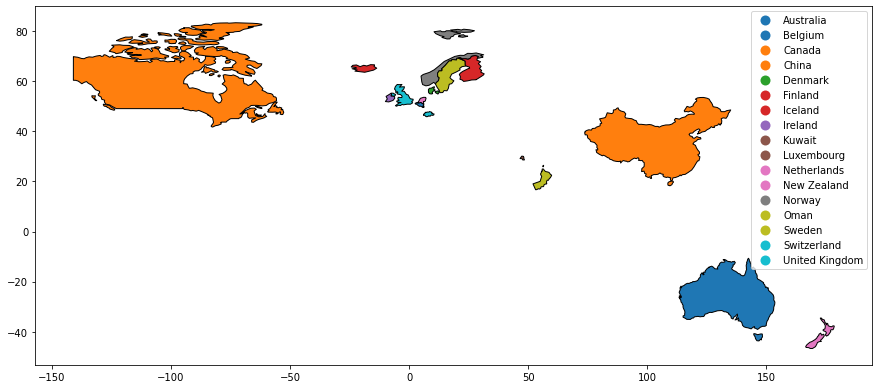

In [143]:
world.plot("name",figsize=(15, 10),legend=True,edgecolor='black')

### Conclusion : 

 - Au niveau de la pertinence du jeu de données : le dataset est pertinent pour répondre à la problématique car il contient des données importantes pour comparer les pays à savoir tous les pays du monde étalés sur une grande tranche d'années sur différentes thématiques : éducatives, démographiques, sociales , économiques avec beaucoup de détails que ça soit en termes de sources ou de descriptions.
 
- Par contre les jeux de données contiennent un nombre très important de NAN  répartis différemmment ( sur des années et sur quelques indicateurs).

- Manque de données sur des sujets importants notamment la possession des ordinateurs et les scores sur quelques disciplines( mathématiques par exemple).